<a href="https://colab.research.google.com/github/Sophiajackrich/Stutern-repo/blob/main/Sophia's_Attrition_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NAME: JACKRICH SOPHIA 

In [7]:
# Standard imports
import pandas as pd
import numpy as np
# Sql library
import sqlite3
import sqlalchemy
from sqlalchemy import create_engine
# Visualisations
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline
from plotly.offline import init_notebook_mode
from plotly.subplots import make_subplots
import plotly.graph_objects as go
# External libraries
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
pd.options.display.float_format = '{:.2f}'.format
init_notebook_mode(connected=True)

In [8]:
%reload_ext sql
%sql sqlite:////content/attr_data.db

'Connected: @/content/attr_data.db'

In [9]:
%%sql
SELECT *
FROM sqlite_master

 * sqlite:////content/attr_data.db
Done.


type,name,tbl_name,rootpage,sql


In [10]:
# Using a function to turn database to pandas format
def query_db(sql_query: str, db_conn: create_engine) -> pd.DataFrame: #(Pandas)
    """This reads SQL query or database table into a DataFrame.
    Parameter
    ---------
    sql_query: str
         The input SQL query,
    db_conn: An instance of create_engine
        This enables you to connect to your database.
    Returns
    -------
    result_df: Pandas DF
    """
    result_df = pd.read_sql(sql=sql_query, con=db_conn)
    return result_df
     

In [11]:
sqlite_con = sqlite3.connect("attr_data.db")



# Extract Data From Database into Pandas DataFrame

In [12]:
attr_data = pd.read_sql_query("SELECT * FROM attrition_records", sqlite_con)

In [13]:
attr_data.head()

,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


## Analyse Attrition Data

# Data attributes/dictionary
Dataset Attributes :
* Age : Numerical Discrete Data
* Attrition : Text Categorical Data
* BusinessTravel : Text Categorical Data
* DailyRate : Numerical Discrete Data
* Department : Text Categorical Data
* DistanceFromHome : Numerical Discrete Data
* Education : Numerical Categorical Data
1 : Below College
2 : College
3 : Bachelor
4 : Master
5 : Doctor
* EducationField : Text Categorical Data
* EmployeeCount : Numerical Categorical Data
* EmployeeNumber : Numerical Categorical Data
* EnvironmentSatisfaction : Numerical Categorical Data
1 : Low
2 : Medium
3 : High
4 : Very High
* Gender : Text Categorical Data
* HourlyRate : Numerical Discrete Data
* JobInvolvement : Numerical Categorical Data
1 : Low
2 : Medium
3 : High
4 : Very High
* JobLevel : Numerical Categorical Data
* JobRole : Text Categorical Data
* JobSatisfaction : Numerical Categorical Data
1 : Low
2 : Medium
3 : High
4 : Very High
* MaritalStatus : Text Categorical Data
* MonthlyIncome : Numerical Discrete Data
* MonthlyRate : Numerical Discrete Data
* NumCompaniesWorked : Numerical Discrete Data
* Over18 : Text Categorical Data
* OverTime : Text Categorical Data
* PercentSalaryHike : Numerical Discrete Data
* PerformanceRating : Numerical  Categorical Data
1 : Low
2 : Good
3 : Excellent
4 : Outstanding
* RelationshipSatisfaction : Numerical Categorical Data
1 : Low
2 : Medium
3 : High
4 : Very High
* StandardHours : Numerical Discrete Data
* StockOptionLevel : Numerical Categorical Data
* TotalWorkingYears : Numerical Discrete Data
* TrainingTimesLastYear : Numerical Discrete Data
* WorkLifeBalance : Numerical Categorical Data
1 : Bad
2 : Good
3 : Better
4 : Best
* YearsAtCompany : Numerical Discete Data
* YearsInCurrentRole : Numerical Discrete Data
* YearsSinceLastPromotion : Numerical Discrete Data
* YearsCurrManager : Numerical Discrete Data


In [14]:
# checking data shape
attr_data.shape

(1470, 36)

In [15]:
# checking fata infomation
attr_data.info()
# all datatypes are correctly casted to individual columns and the data is intact

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1470 non-null   int64 
 1   Age                       1470 non-null   int64 
 2   Attrition                 1470 non-null   object
 3   BusinessTravel            1470 non-null   object
 4   DailyRate                 1470 non-null   int64 
 5   Department                1470 non-null   object
 6   DistanceFromHome          1470 non-null   int64 
 7   Education                 1470 non-null   int64 
 8   EducationField            1470 non-null   object
 9   EmployeeCount             1470 non-null   int64 
 10  EmployeeNumber            1470 non-null   int64 
 11  EnvironmentSatisfaction   1470 non-null   int64 
 12  Gender                    1470 non-null   object
 13  HourlyRate                1470 non-null   int64 
 14  JobInvolvement          

In [16]:
# checking for missing data
attr_data.isnull().sum()
# No null values present in the data

id                          0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCur

In [17]:
# checking for duplicates
attr_data.duplicated().sum()
# No duplicates in the data

0

In [18]:
# checking the describtion of the data of some columns
attr_data.describe()

,id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00
mean,735.50,36.92,802.49,9.19,2.91,1.00,1024.87,2.72,65.89,2.73,2.06,2.73,6502.93,14313.10,2.69,15.21,3.15,2.71,80.00,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,424.50,9.14,403.51,8.11,1.02,0.00,602.02,1.09,20.33,0.71,1.11,1.10,4707.96,7117.79,2.50,3.66,0.36,1.08,0.00,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,1.00,18.00,102.00,1.00,1.00,1.00,1.00,1.00,30.00,1.00,1.00,1.00,1009.00,2094.00,0.00,11.00,3.00,1.00,80.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,368.25,30.00,465.00,2.00,2.00,1.00,491.25,2.00,48.00,2.00,1.00,2.00,2911.00,8047.00,1.00,12.00,3.00,2.00,80.00,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,735.50,36.00,802.00,7.00,3.00,1.00,1020.50,3.00,66.00,3.00,2.00,3.00,4919.00,14235.50,2.00,14.00,3.00,3.00,80.00,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,1102.75,43.00,1157.00,14.00,4.00,1.00,1555.75,4.00,83.75,3.00,3.00,4.00,8379.00,20461.50,4.00,18.00,3.00,4.00,80.00,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,1470.00,60.00,1499.00,29.00,5.00,1.00,2068.00,4.00,100.00,4.00,5.00,4.00,19999.00,26999.00,9.00,25.00,4.00,4.00,80.00,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


# Exploratory Analysis

#### Visualising the feature columns against the target(attrition columns)

In [19]:
# Using the describe method to aggregate 'Yes'(People who are attrited) and 'No'(People who are'nt attrite)
yes = attr_data[attr_data['Attrition'] == 'Yes'].describe().T
no = attr_data[attr_data['Attrition'] == 'No'].describe().T


In [20]:
yes.head()

,count,mean,std,min,25%,50%,75%,max
id,237.00,725.46,409.74,1.00,386.00,733.00,1057.00,1462.00
Age,237.00,33.61,9.69,18.00,28.00,32.00,39.00,58.00
DailyRate,237.00,750.36,401.90,103.00,408.00,699.00,1092.00,1496.00
DistanceFromHome,237.00,10.63,8.45,1.00,3.00,9.00,17.00,29.00
Education,237.00,2.84,1.01,1.00,2.00,3.00,4.00,5.00


In [21]:
colors = sns.color_palette(palette='colorblind', n_colors=10)

In [22]:
colors

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

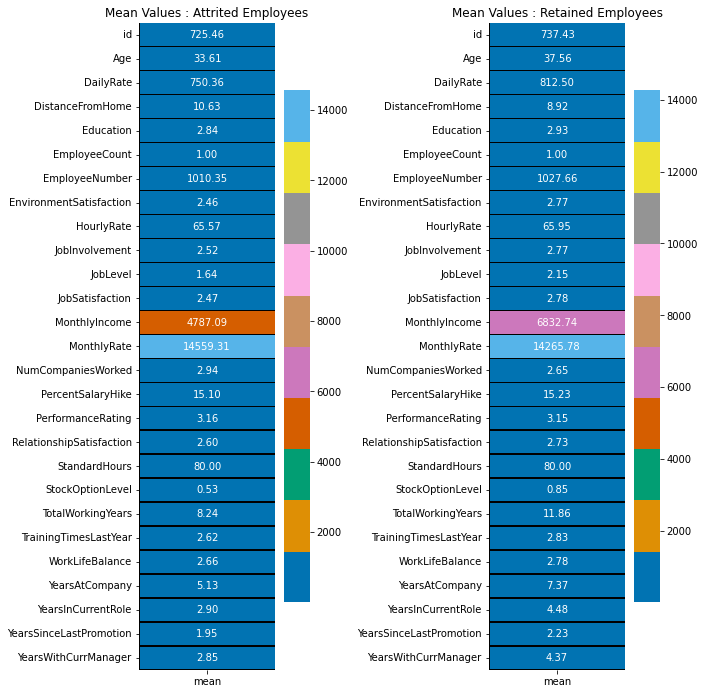

In [23]:
colors = sns.color_palette(palette='colorblind', n_colors=10)
fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (10,10))
plt.subplot(1,2,1)
sns.heatmap(yes[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = True,fmt = '.2f')
plt.title('Mean Values : Attrited Employees');

plt.subplot(1,2,2)
sns.heatmap(no[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = True,fmt = '.2f')
plt.title('Mean Values : Retained Employees');

fig.tight_layout(pad = 2)


* Mean values of all the numerical features for cases of Attrited Employees and Retained Employees.
* When considering age, mean values of staying employees is 37.56 i.e more than the departing employess, 33.61.
* Similarly, DailyRate & JobLevel is higher for staying employees than departing employees.
* Staying employees have higher values for features : TotalWorkingYears, YearsAtCompany, YearsInCurrentRole & YearsWithCurrManager.
* Staying employees and Attrited employes have equal mean value which is high for 'StandardHours'. This could mean that they both have equal hours but staying employees probably earn higher.
* Staying employees have larger mean value than Attrited employees for MonthlyIncome, meaning they probably have higher/larger wages, which prompts staying employees to stay.
* Lastly, Attrited employees have slightly higher performance than staying employees and could mean they work harder than those being payed higher but still get low wages and causes them to have reason to search for better opportunity. 

* Conclusion: Hypothetically, this analytical findings of the Attritted employees against the Staying employees gives little insights as to why employees get attrited and some stay back. Meanwhile, i noticed the huge differencies in the mean values of Atrritted employees and Staying employees, this could be as a result of outliers, but with more visualisation using EDA and performing statistical tests, more insigths about this observation would be revealed

* This is a heatmap that displays the mean values of all the columns against attrition occuring(yes). The colorbar shows the color scale from the lowest to the highest. Majority has a low mean and vey few have average or very high mean values.

* Hypothesis: This could be as a result of    outliers in the YES proportion of Attrition 

## Dividing features into Numerical and Categorical

In [24]:
discrete_features = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
                 'PercentSalaryHike', 'StandardHours', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 
                 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
categorical_features = ['Attrition', 'BusinessTravel','Department', 'Education', 'EducationField', 'EmployeeCount','EmployeeNumber',
                    'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
                    'MaritalStatus', 'Over18', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
                    'WorkLifeBalance']


In [25]:
# creating a copied data from the original, to perform some explorative analysis
df = attr_data.copy(deep = True)

* According to the dataset information, i divided the features into categorical and discrete features. for the numerical features, i termed them discrete because they arent continous.
* Typical approach for this division of features can also be based on the datatypes of the elements of the respective attribute. Tho, some categorical features are encoded numerically, and converted by pandas to integer datatypes
Eg: datatype = datatype = integer, attribute = numerical feature ; datatype = string, attribute = categorical feature. but this isnt always the case as some categorical data could have integer types due to being encoded numerically. 

* Creating a deep copy of the orginal dataset for experimenting with data, visualization and modeling.
* Modifications in the original dataset will not be highlighted in this deep copy.
* Now, i would LabelEncode the categorical features with text data.

In [26]:
# import tqdm and scikit libraries
# tqdm is a python library used to create/ display a smart progress meter 
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder



In [27]:
# checking the info of the copied data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1470 non-null   int64 
 1   Age                       1470 non-null   int64 
 2   Attrition                 1470 non-null   object
 3   BusinessTravel            1470 non-null   object
 4   DailyRate                 1470 non-null   int64 
 5   Department                1470 non-null   object
 6   DistanceFromHome          1470 non-null   int64 
 7   Education                 1470 non-null   int64 
 8   EducationField            1470 non-null   object
 9   EmployeeCount             1470 non-null   int64 
 10  EmployeeNumber            1470 non-null   int64 
 11  EnvironmentSatisfaction   1470 non-null   int64 
 12  Gender                    1470 non-null   object
 13  HourlyRate                1470 non-null   int64 
 14  JobInvolvement          

In [28]:
# Instantial label encoder to a variable
le = LabelEncoder()
# create three empty lists to store result
l1 = []; l2 = []; txt_cat_features = []
# print 'Label Encoder Transformation'
print('Label Encoder Transformation')
# Wrap the categorical feature with 'tqdm', display a smart progress meter 
# and use a for loop to iterate through the wrapped tqdm-categorical features
for i in tqdm(categorical_features):
    # use a conditional statement to verify,
    # if the datatype of the iterated object is a string/object variable
    if type(df[i][0]) == str:
       # append looped result to 'txt_cat_features'
       txt_cat_features.append(i)
       #  using a fit_transform which fits the label encoder with 'df[i]' as an argument in it,
       # and return encoded labels
       df[i] = le.fit_transform(df[i])
       # append a list of each unique values of df[i]  and store into l1 and
       # append a list of the transformed df[i] labels back to original encoding,
       # that is back to its original format.
       l1.append(list(df[i].unique())); l2.append(list(le.inverse_transform(df[i].unique())))
       # print the outputs of i and unique values of the df[i] equal to the inverse transform of the unique d[i]
       print(i,' : ',df[i].unique(),' = ',le.inverse_transform(df[i].unique()))
      
    

Label Encoder Transformation


100%|██████████| 20/20 [00:00<00:00, 284.62it/s]

Attrition  :  [1 0]  =  ['Yes' 'No']
BusinessTravel  :  [2 1 0]  =  ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department  :  [2 1 0]  =  ['Sales' 'Research & Development' 'Human Resources']
EducationField  :  [1 4 3 2 5 0]  =  ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender  :  [0 1]  =  ['Female' 'Male']
JobRole  :  [7 6 2 4 0 3 8 5 1]  =  ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus  :  [2 1 0]  =  ['Single' 'Married' 'Divorced']
Over18  :  [0]  =  ['Y']
OverTime  :  [1 0]  =  ['Yes' 'No']


### Documentation of the LabelEncoder Code on categorical features

* Instantial label encoder to a variable
* create three empty lists to store result
* print 'Label Encoder Transformation'
* Wrap the categorical feature with 'tqdm',  display a smart progress meter 
 and use a for loop to iterate through the wrapped tqdm-categorical features
* Use a conditional statement to verify,
   if the datatype of the iterated object is a string/object variable
* Append looped result to 'txt_cat_features'
 using a fit_transform which fits the label   encoder with 'df[i]' as an argument in it,
and return encoded labels
* Append a list of each unique values of df[i]  and store into 'l1' and
* Append a list of the transformed df[i] labels back to original encoding,
that is back to its original format and store in 'l2'.
* print the outputs of i and unique values of the df[i] equal to the inverse transform of the unique d[i]

## Storing the label encoded transformations inside a dictionary to display information about its encoded value and its original value

In [29]:
# create an empty dictionary
tf = {}
# iterate through the range of the length of 'txt_cat_features' using a forloop
for i in range(len(txt_cat_features)):
    # store the iterated value in a dictionary as a key-value pair
    tf[txt_cat_features[i]] = {}
    # use zip to join l1[i]and l2 together and iterate through it
    for j,k in zip(l1[i],l2[i]):
      #store the iterated result in a dictionary
      tf[txt_cat_features[i]][j] = k

In [30]:
print(tf[txt_cat_features[i]])


{1: 'Yes', 0: 'No'}


## Distribution of Categorical Features

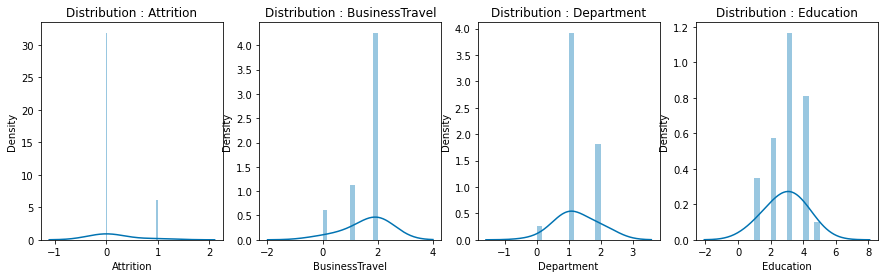

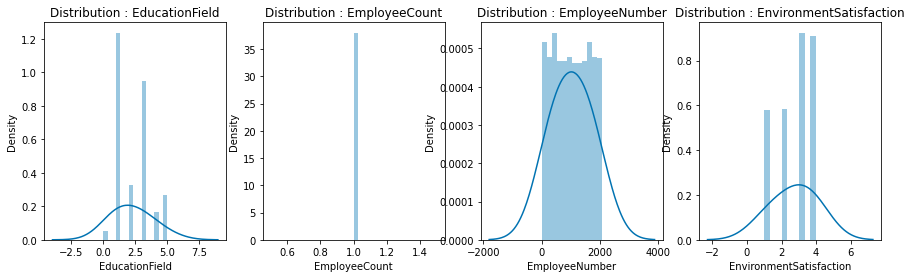

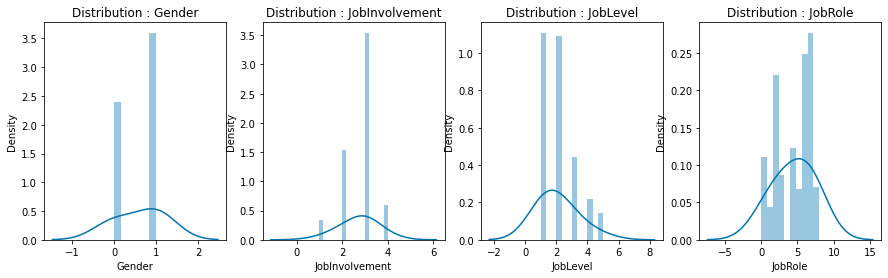

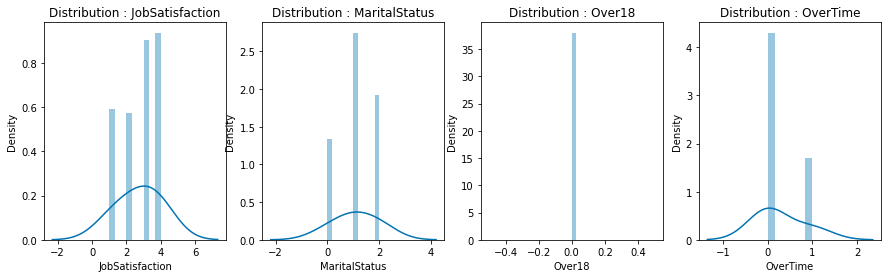

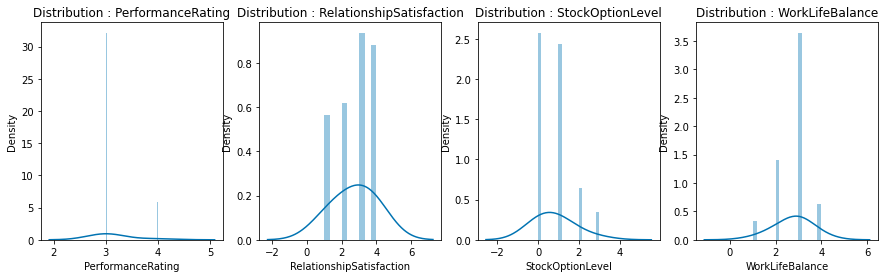

In [31]:
# Iterate through a range of 5
for i in range(5):
   # for each 5 range(rep the rows), create a subplot with 4 columns
   fig, ax = plt.subplots(ncols = 4,figsize = (15,4))
   # assigning 1 to 'a' as the subplot index
   a = 1
   # iterate through the cat features and return only unique features
   for j in categorical_features[(i*4) : (i*4) + 4]:
      # create a subplot that plots each feature using the same subplot param,
      # created above and its index 'a'
      plt.subplot(1,4,a)
      # in each subplots, plot a distplot graph
      sns.distplot(df[j],kde_kws = {'bw' : 1},color = colors[0]);
      plt.title('Distribution : ' + j)
      a += 1
 

* **EmployeeNumber** is a just a unique identifying number with no repetitive elements. Hence, its adviced to drop the feature because it has high cardinality and would cause space consumption and curse of dimensionality effect when preping for modelling stage.
* A **bimodal** distribution pattern can be observed for JobRole, which is likely caused by combining its many values.
* A lot of features have slight **rightly** & **leftly** skewed data distribution.
* **Over18** & **EmployeeCount** are single value features, which would need to be dropped as it may hold no relevance as to why employees get attritted or in the modelling stage.
 
* I would drop the redundant features from the dataframe as well as from the list of categorical features. I will also drop the **Attrition** feature as it is the target variable & will consider it separately.

# Dropping Redundant features

In [32]:
# dropping "'EmployeeCount', 'EmployeeNumber', 'Over18'" from the copied dataframe
df.drop(columns = ['EmployeeCount', 'EmployeeNumber', 'Over18'], inplace = True)
# remove the "'EmployeeCount', 'EmployeeNumber', 'Over18', 'Attrition'" from 'categorical_Features'
categorical_features.remove('EmployeeCount'); categorical_features.remove('EmployeeNumber') 
categorical_features.remove('Over18'); categorical_features.remove('Attrition')

# Distribution of Discrete Features

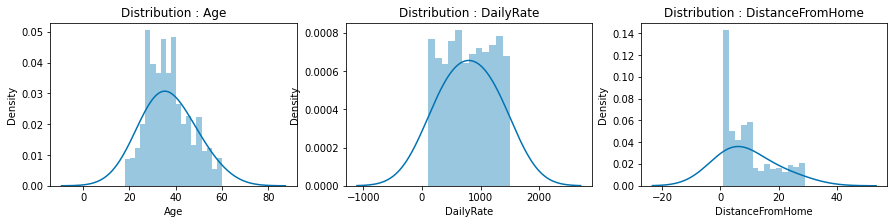

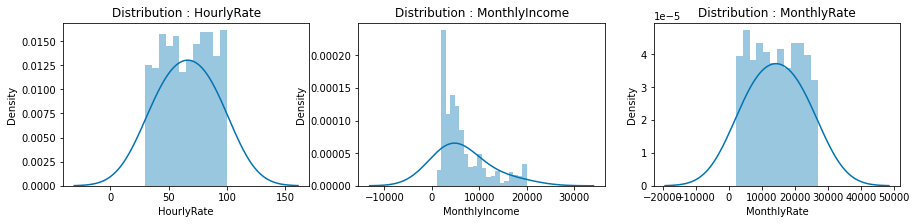

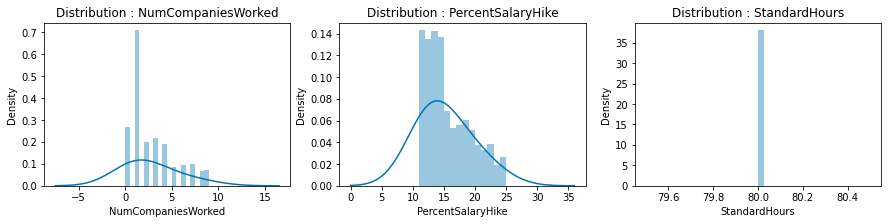

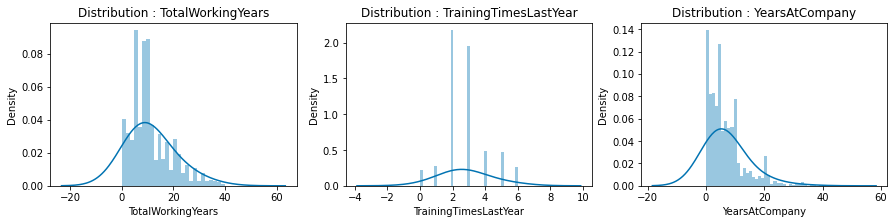

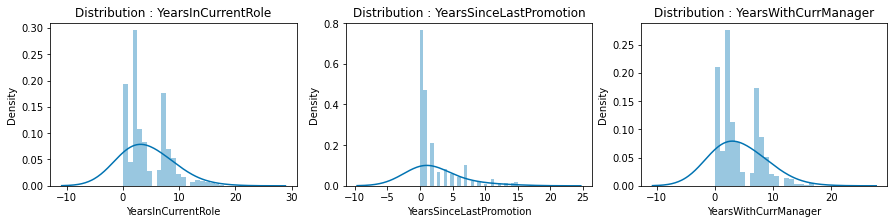

In [33]:
# Iterate through a range of 5
for i in range(5):
   # for each 5 range(rep the rows), create a subplot with 3 columns
    fig, ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,3))
    # assigning 1 to 'a' as the subplot index
    a = 1
    # iterate through the cat features and return only unique features
    for j in discrete_features[(i*3) : (i*3) + 3]:
      # create a subplot that plots each feature using the same subplot param,
      # created above and its index 'a'
      plt.subplot(1,3,a)
      # in each subplots, plot a distplot graph
      sns.distplot(df[j],kde_kws = {'bw' : 1},color = colors[0]);
      plt.title('Distribution : ' + j)
      a += 1
      

* **HourlyRate**, **DailyRate** & **MonthlyRate** display graphs that are usually found in Time Series. Their graphs display values w.r.t time.
* **DistanceFromHome**, **MonthlyIncome**, **NumCompaniesWorked**, **PercentSalaryHike**, **TotalWorkingYears**, **YearsAtCompany** & **YearsSinceLastPromotion** all display a rightly-skewed data distribution.
* **YearsInCurrentRole** & **YearsWithCurrManager** have a bimodal data distribution. 
* **StandardHours** is a single value feature, meaning the company have an expected level of efficiency in an hour .

* i would now drop the redundant features from the dataframe as well as from the list of discrete features so as to not cause unnecessary space consumption and avoid issue of low cardinality.

In [34]:
# drop low cardinality/single value feature
df.drop(columns = ['StandardHours'], inplace = True)
discrete_features.remove('StandardHours')

# Questons to be answered from the data

 *  What are the three factors behind employee attrition?
 * What is the Relationship Between Education and Monthly Income?
 * What is the effect of age on Attrition?
 * Is Income the main factor in employee attrition?
 * How does work-life balance impact the overall attrition rate??


#### 1) To answer the first question, i would perform analysis on the remaining 30 columns w.r.t Attrition to et insights on the factors that leeads to employee attrition.

# Target Variable Visualization (Attrition):

[1233, 237]
[83.87755102040816, 16.122448979591837]


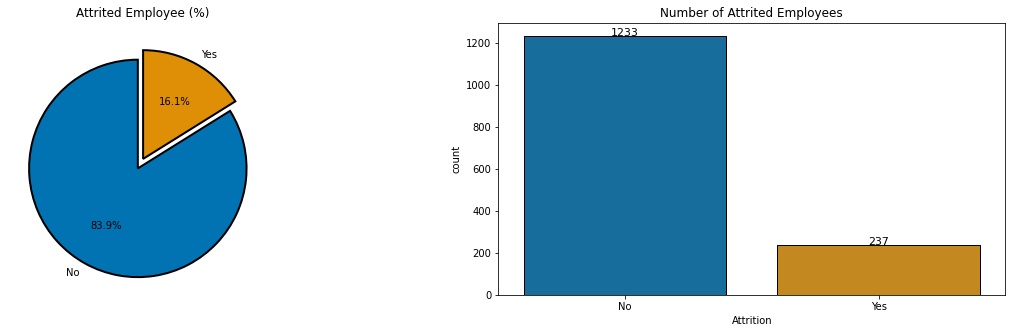

In [35]:
# wrap attrition value counts of 'No' & 'Ýes' in a list and assign to a variable
l = list(df['Attrition'].value_counts())
print(l)
# perform a mathematical computation on l[0] and l[1], then assign to a variable
circle = [l[0] / sum(l) * 100, l[1] / sum(l) * 100]
print(circle)
# use a subplot to plot the graph 
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
# se a pie chart to see the percentile distribution of attrition on the copied data
plt.pie(circle,labels = list(tf['Attrition'][j] for j in sorted(df['Attrition'].unique())),autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 2,'antialiased' : True})
plt.title('Attrited Employee (%)');

plt.subplot(1,2,2)
# use a countplot to count the distribution of 'Yes' & 'No' in the data
ax = sns.countplot('Attrition',data = df, palette = colors,edgecolor = 'black')
# iterate through the size of the ax plot
for rect in ax.patches:
    # perform a mathematical computation to get a befitting size of x and height
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(tf['Attrition'][j] for j in sorted(df['Attrition'].unique()))
plt.title('Number of Attrited Employees');

* This shows that the dataset in respect to **Attrition** is highly **imbalanced!**
* 5.2 : 1 ratio for **Retained Employees** : **Attrited Employee** is found!
* Due to this, predictions will be biased towards Retention cases i.e it would causes it to be biased on the training of classifiers and this results in lower accuracy of the **minority** classes prediction, which in **yes** distribution in this case.
* Visualizations will also display this bias data, thus making it difficult to gain insight.

**After dropping the unneccessary features, now i'll group the remaining 30 features into a group**

* Employee's personal biodata
* Employee - Job Information
* Employee - Company Information
* Company Features
* Finances

In [36]:
l1 = ['Age', 'Gender','MaritalStatus', 'Education', 
      'DistanceFromHome', 'TotalWorkingYears', 'NumCompaniesWorked'] # General Employee Information

l2 = ['EducationField', 'Department', 'JobLevel', 'JobRole', 
      'JobInvolvement', 'OverTime', 'JobSatisfaction'] # Employee Job Information

l3 = ['YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager', 
      'YearsSinceLastPromotion', 'TrainingTimesLastYear', 'WorkLifeBalance'] # Employee - Company Information

l4 = ['PercentSalaryHike', 'StockOptionLevel', 'BusinessTravel', 
      'PerformanceRating', 'EnvironmentSatisfaction', 'RelationshipSatisfaction'] # Company Information 

l5 = ['MonthlyIncome', 'HourlyRate', 'DailyRate', 'MonthlyRate'] # Finances


In [37]:
# create a dummy dataframe, so as to notmess the copied dataframe
df1 = pd.DataFrame()
# Insantiate copied dataframe with 'Attrition' feature to the dummy datafram,
# so as to store features needed to be manipulated,
# for drawing insights from the group of features for visualization purposes
df1['Attrition'] = df['Attrition']

## Employee's personal biodata :

* Includes features that provide information about the basic information of an employee!

* List of Features :
    * Age
    * Gender
    * MaritalStatus
    * Education
    * DistanceFromHome
    * TotalWorkingYears
    * NumCompaniesWorked


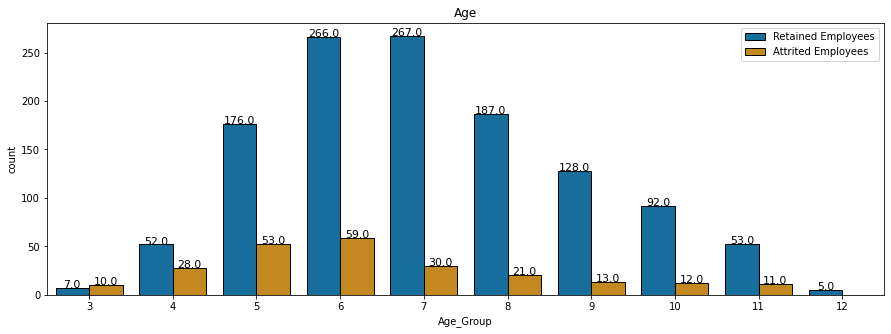

In [38]:
# Iterate over Áge column in the copied dataframe, divide the value by 5
#(this is to group them according to the divided result e.g 18/5 = 3.6),
# after each iteration, and convert it from float to an integer, and instantiate it
# to the dummy dataframe.
df1['Age_Group'] = [int(i/5) for i in df['Age']]
# create a figsize
plt.figure(figsize = (15,5))
# use countplot to visualize the Age_group w.r.t 'Attrition'
ax = sns.countplot('Age_Group', data = df1, hue = 'Attrition', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 11)
    # Add a legend 
plt.legend(['Retained Employees', 'Attrited Employees'], loc = 'upper right')
plt.title('Age');

* **Attrition** is present in near about all the age groups.
* For **Age** values between **30 - 34**, highest number of employees, **59**, have departed. Employees with **Age** values **25 - 29** come second with **53** employees discontinuing their jobs with the company.
* **Age** values from **20 - 24** & **35 - 40** near about display the same number of attrited employees with **28** & **30** respectively.
* Employees above the age of **40** have also been relieved of their duties.

Conclusion: This may not neccessarily be a factor of attrition, but it seems other attributes could make us understang better why people younger than 35, gets to leave or probably sacked e.g attributes like 'monthlyincome', 'percentsalaryhiked' or 'totalNumberOfYears' e.t.c

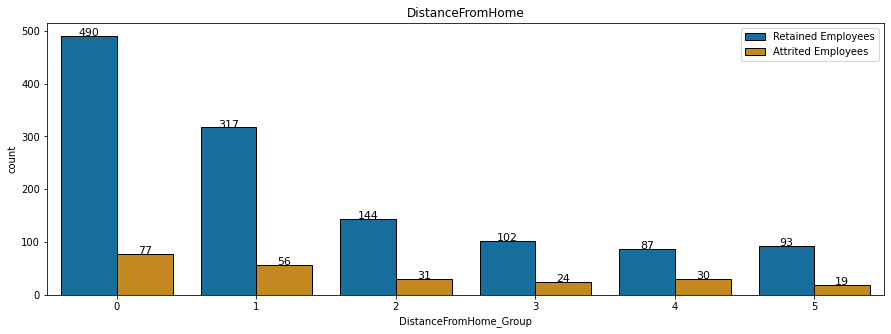

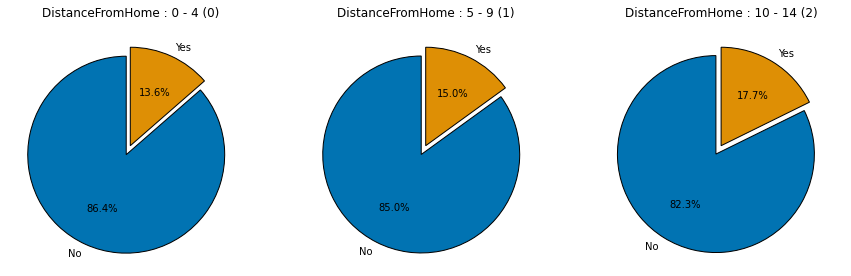

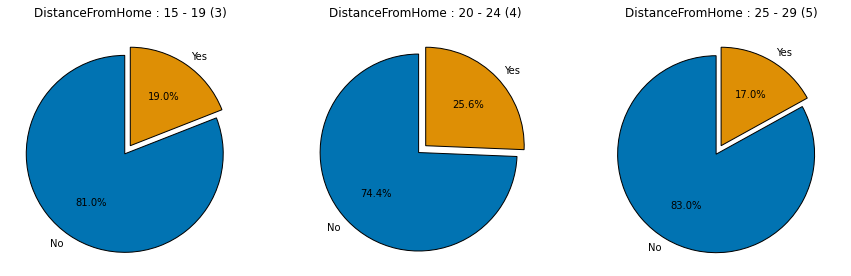

In [39]:
# Perform same operation done on Age_group with distancefromhome group with slight 
# additions
df1['DistanceFromHome_Group'] = [int(i/5) for i in df['DistanceFromHome']]

plt.figure(figsize = (15,5))
ax = sns.countplot('DistanceFromHome_Group', data = df1, hue = 'Attrition', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.legend(['Retained Employees', 'Attrited Employees'], loc = 'upper right'); plt.title('DistanceFromHome');
# iterate through range of two values
for i in range(2):
    # create subplots of one row, 3columns and a = index value for fig size
    fig = plt.subplots(nrows = 1,ncols = 3,figsize = (15,15)); a = 1
    # inside the present loop, iterate through a range of 3 values
    for j in range(3):
        # create subplot that would be iterated over 3 times
        plt.subplot(1,3,a)
        # add a conditional statement if value equals 0,
        if i == 0:
            # then perform an operation using loc and turning it to a list and storing it in a variable.
            l = list(df.loc[(df1['DistanceFromHome_Group'] == j)]['Attrition'].value_counts())
            # else if i doesnt equal 0 then perform :
        else:
            l = list(df.loc[(df1['DistanceFromHome_Group'] == (j+3))]['Attrition'].value_counts())
            
        circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]
        plt.pie(circle,labels = list(tf['Attrition'][k] for k in sorted(df1['Attrition'].unique())),autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),
                colors = colors, wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
        if i == 0:
            plt.title('DistanceFromHome : ' + str(j*5) + ' - ' + str(j*5 + 4) + ' ('+ str(j) + ')');
        else:
            plt.title('DistanceFromHome : ' + str((j+3)*5) + ' - ' + str((j+3)*5 + 4) + ' ('+ str(j+3) + ')');
        a += 1


* From the 1st graph, we can say that employees living nearest to the company i.e within **0 - 4**, they have been attritted the most, however when we check the percentage of attrition, it tells us a different story.
* Employees living within the distance of **0 - 4** have been attrited the least. As the value of **DistanceFromHome** increases, employee attrition increases!


Conclusion: This could be a factor of employee attrition, tho alongside with other attributes, we might get a better understanding.

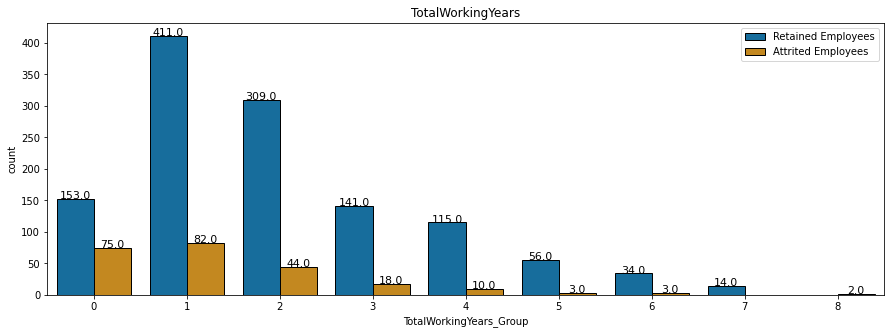

In [40]:
# Iterate over 'TotalWorkingYears' column in the copied dataframe, divide the value by 5,
# after each iteration, and convert it from float to an integer, and instantiate it
# to the dummy dataframe.
df1['TotalWorkingYears_Group'] = [int(i/5) for i in df['TotalWorkingYears']]
# create a fig size
plt.figure(figsize = (15,5))
# use a countplot to count the frequency of TotalWorkingYears against Attrition
ax = sns.countplot('TotalWorkingYears_Group', data = df1, hue = 'Attrition', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 11)
# Add a legend
plt.legend(['Retained Employees', 'Attrited Employees'], loc = 'upper right')
# Add a title
plt.title('TotalWorkingYears');

* From the visualization, i can say that employees **within their 1st 10 years of work experience** are highly prone to being removed!
* As the work experience increases, chances of attrition reduces!
* Due to the rate of deduction in numbers, its likely most people decide to work for the company to gain the experience or the company **relieves** people after a certain amount of years

Conclusion: This could also be a clear factor of attrition, because the employees with less experience, get to propably mess up at the job or are mainly removed without replacement after some years

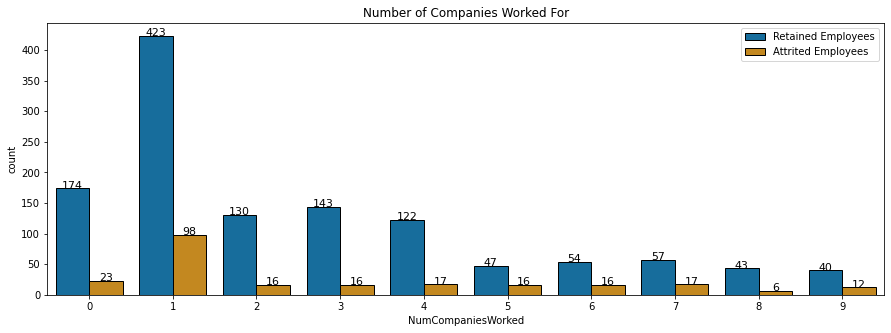

In [41]:
# NumCompaniesWorked against Attrition using a Countplot
plt.figure(figsize = (15,5))
ax = sns.countplot('NumCompaniesWorked', data = df, hue = 'Attrition', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.legend(['Retained Employees', 'Attrited Employees'], loc = 'upper right')
plt.title('Number of Companies Worked For'); 
            
       
      

* There is clearly a lot of volatility seen between **1st - 2nd** job.
* This volatility gets calmed down after the 2nd job.
* However, as the employee works in more than **4 companies**, chances of **attrition** increase drastically.
* It also seems the company dont hire many people that have more than 4 years work experience for some reasons.
 
Conclusion: This doesnt give a clear reason as to why employees get attritted, because the company dont also seem to hire alot  after 4years working experience and still gets to lay off those with quite a number of experience, maybe need freshbloods.

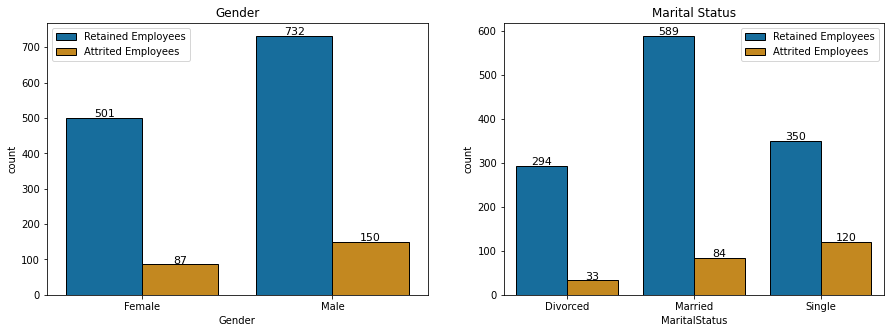

In [42]:
# Visualization of ''Gender' and 'MaritalStatus' w.r.t 'Attrition' using Countplot
fig = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
# First Subplot
plt.subplot(1,2,1)
ax = sns.countplot('Gender',data = df, hue = 'Attrition', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(tf['Gender'][j] for j in sorted(df['Gender'].unique()))
plt.legend(['Retained Employees', 'Attrited Employees'])
plt.title('Gender');

# Second Subplot
plt.subplot(1,2,2)
ax = sns.countplot('MaritalStatus',data = df, hue = 'Attrition', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(tf['MaritalStatus'][j] for j in sorted(df['MaritalStatus'].unique()))
plt.legend(['Retained Employees', 'Attrited Employees'])
plt.title('Marital Status');

* According to the data, **male employees are employed more than the female employees**, and **male employees get attrited more than the female employees.**
* According to the **Marital status** data, ** Married employees are more than any other status**. **Single employees get attritted more than any other status, followed by married employees and divorce employees come last**

CONCLUSION:
Hypothetically, w.r.t the 'Gender' data ** it could be that male employees get attrited more due to illegal behaviours or they put themselves more out there searching for better jobs inother to make a good living more than the female employees**.

W.r.t. the ''MaritalStatus' data, **it could be that single employees get either laid off or decide to get a better job to make a much better living and could be linked to the gender column w.r.t **male** employees**

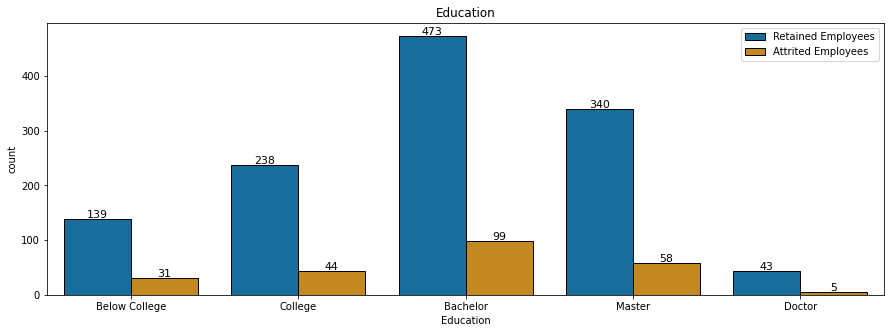

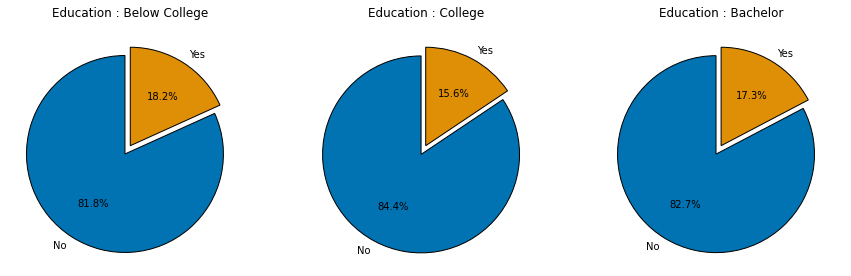

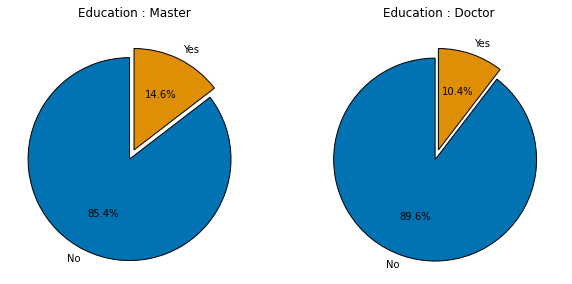

In [43]:
# Visualization of 'Education' w.r.t 'Attrition' column using a countplot
plt.figure(figsize = (15,5))
ax = sns.countplot('Education',data = df, hue = 'Attrition', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['Below College', 'College', 'Bachelor', 'Master', 'Doctor'])
plt.legend(['Retained Employees', 'Attrited Employees'])
plt.title('Education');

# create a fig sized subplot 
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (15,15))
# iterate through the range 
for i in range(1,4):
    # within the loop, create a subplot and for each iteration, 
    # the value would rep the index of the subplot
    plt.subplot(1,3,i)
    # Get the value_counts of copied data of education equal to the values in the loop,
    # and groupby the 'Attrition',then loc this back to the copied dataframe. 
    l = list(df.loc[(df['Education'] == i)]['Attrition'].value_counts())
    # perform a ,athematical computation to see the percents of education grouped by 'No' & 'Yes'
    circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]
    # use a pie chart to visualize the proportion of YES & NO in education
    plt.pie(circle,labels = list(tf['Attrition'][k] for k in sorted(df1['Attrition'].unique())),autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),
            colors = colors, wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
    plt.title('Education : ' + ['Below College', 'College', 'Bachelor', 'Master', 'Doctor'][i-1]);

# create another figsized plot    
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (10,10))
# iterate through the range values of 2
for i in range(2):
    # within the loop, create a subplot and for each iteration, 
    # the value would rep 'index of the subplot with increment of + 1' 
    plt.subplot(1,2,i+1)
    # Get the value_counts of copied data of education equal to the (index values in the loop with increment of + 4),
    # and groupby the 'Attrition',then loc this back to the copied dataframe. 
    l = list(df1.loc[(df['Education'] == (i+4))]['Attrition'].value_counts())
    # perform a ,athematical computation to see the percents of education grouped by 'No' & 'Yes'
    circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]
    plt.pie(circle,labels = list(tf['Attrition'][k] for k in sorted(df1['Attrition'].unique())),autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),
            colors = colors, wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
    plt.title('Education : ' + ['Below College', 'College', 'Bachelor', 'Master', 'Doctor'][i-2]);

    

* In the first chart, Employees with Bachelor's degree have been discontinued the most times followed by employees with Master's degree.
* Surprisingly, employees with Below College education come at the 4th rank out of 5. 
* But in the second chart, employees with below college have the highest attrition rate.
* Docter degree employees have been attrited the least number of times & also has the lowest attrition rate.

Conclusion: This is an attribute that goes with other underlying attributes to determine reasons of **Attrition**.

# Employee Job Information (second group)

* This includes features that provide   information about the job & it's characteristics!

* **List of Features** :
    * EducationField
    * Department
    * JobLevel
    * JobRole
    * JobInvolvement
    * OverTime
    * JobSatisfaction

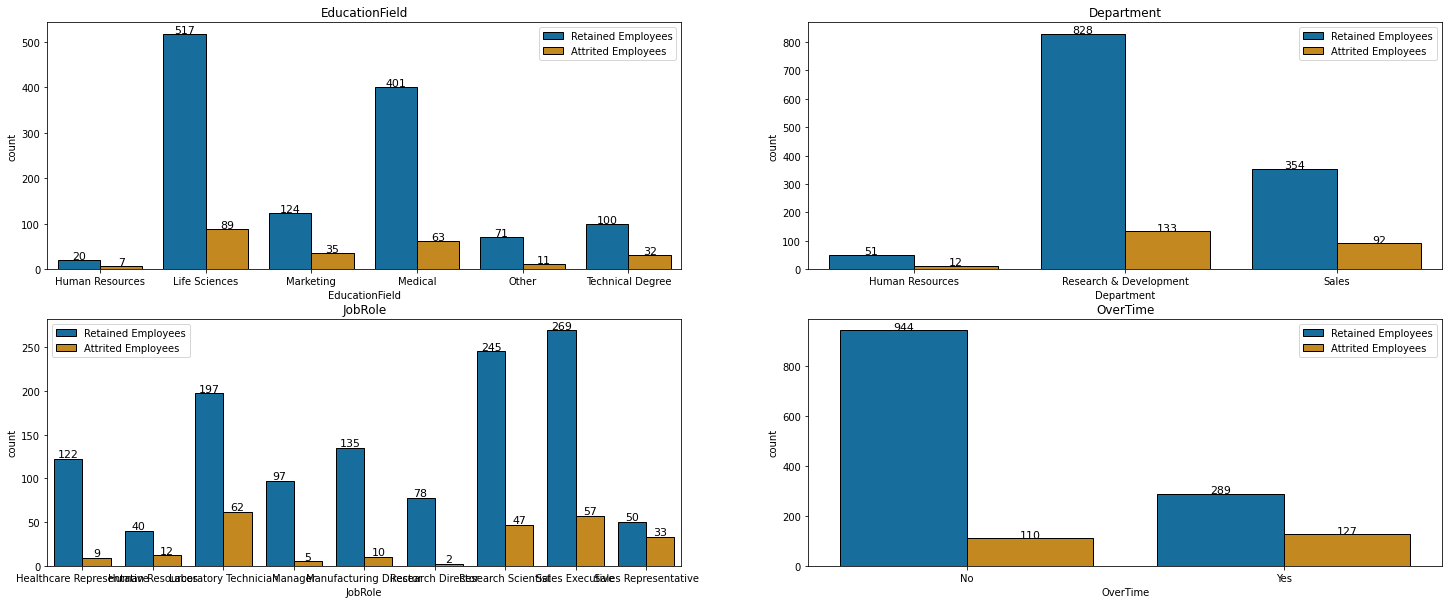

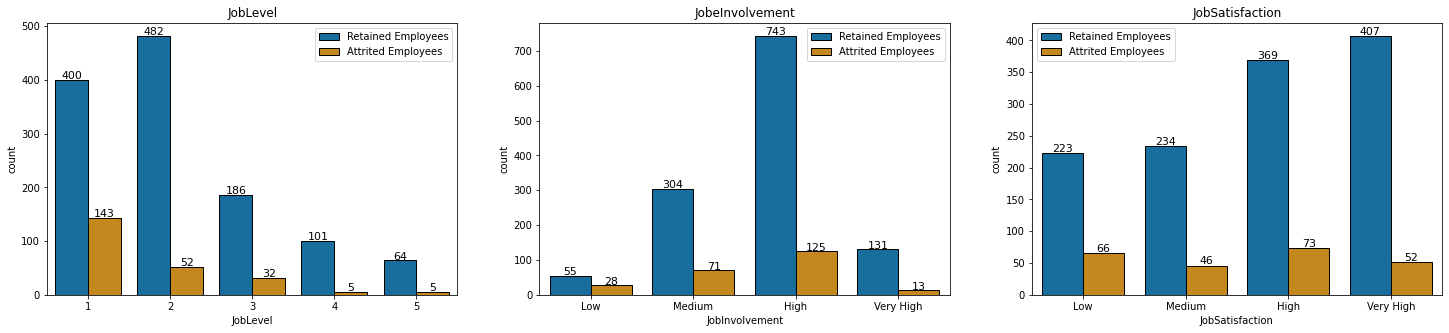

In [44]:
# Visualizing the first four features together w.r.t 'Attrition: YES & NO'

# create the figsize
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (25,10))

# iterate through a range of 4 values 
for i in range(4):
    # within the loop, create a subplot with the iterated range as the index, with an increment of 1
    plt.subplot(2,2,i+1)
    # use a countplot to visualize the features w.r.t the target column i.e Attrition
    ax = sns.countplot(['EducationField', 'Department', 'JobRole', 'OverTime'][i],data = df, 
                       hue = 'Attrition', palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    ax.set_xticklabels(tf[['EducationField', 'Department', 'JobRole', 'OverTime'][i]][j] 
                       for j in sorted(df[['EducationField', 'Department', 'JobRole', 'OverTime'][i]].unique()))
    plt.legend(['Retained Employees', 'Attrited Employees'])
    plt.title(['EducationField', 'Department', 'JobRole', 'OverTime'][i]);


# creating another figsize 
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,5))
#First subplot: Visualisation of 'Joblevel' wrt 'Attrition' using a countplot to visualize
plt.subplot(1,3,1)
ax = sns.countplot('JobLevel',data = df, hue = 'Attrition', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.legend(['Retained Employees', 'Attrited Employees'])
plt.title('JobLevel');

# Second subplot: Visualisation of Jobinvolvement w.r.t 'Attrition'
plt.subplot(1,3,2)
ax = sns.countplot('JobInvolvement',data = df, hue = 'Attrition', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['Low', 'Medium','High','Very High'])
plt.legend(['Retained Employees', 'Attrited Employees'])
plt.title('JobeInvolvement');

# Third subplot: Visualisation of 'JobSatisfaction' wrt 'Attrition' using a countplot to visualize
plt.subplot(1,3,3)
ax = sns.countplot('JobSatisfaction',data = df, hue = 'Attrition', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['Low', 'Medium', 'High','Very High'])
plt.legend(['Retained Employees', 'Attrited Employees'])
plt.title('JobSatisfaction');

* **These graphs have almost follow same pattern with more people clustered in one category, and have higher number of attrited employees**
* Though this could be tricky, as it isnt really clear on the complete picture. i will check the attrition percentage of the individual category.

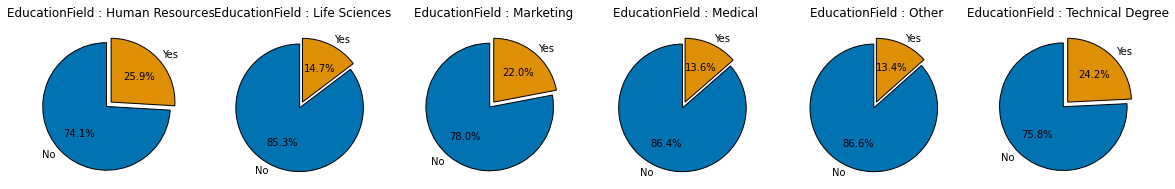

In [45]:
# Checking the percentage category for Educationfield grouped by 'Attrition' column
# create a subplot of 1 row and 6 cols , with a figsize
fig = plt.subplots(nrows = 1,ncols = 6,figsize = (20,20))
# iterate through the range of the length of the unique values in the 'EducationField'.
for i in range(len(df['EducationField'].unique())):
  # within the loop, create a subplot with the iterated values as the index, incremented by 1
    plt.subplot(1,6,i+1)
    # Get the value_counts of copied data of EducationField equal to the values in the loop,
    # and groupby the 'Attrition',then loc this back to the copied dataframe. 
    l = list(df.loc[(df['EducationField'] == i)]['Attrition'].value_counts())
    # perform a mathematical computation to get the percentage of YES and NO in the EducationField
    circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]
    # plot a pie chart
    plt.pie(circle,labels = list(tf['Attrition'][k] for k in sorted(df['Attrition'].unique())),autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),
            colors = colors, wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
    b = list(tf['EducationField'][k] for k in sorted(df['EducationField'].unique()))
    plt.title('EducationField : ' + b[i]);

* According to the data, **employees with EducationField of Human Resources, Technical Degree & Marketing have a higher chance of being removed**.

Conclusion: For the particular company, it could lead to being a reason of attrition alongside other underlying factors.

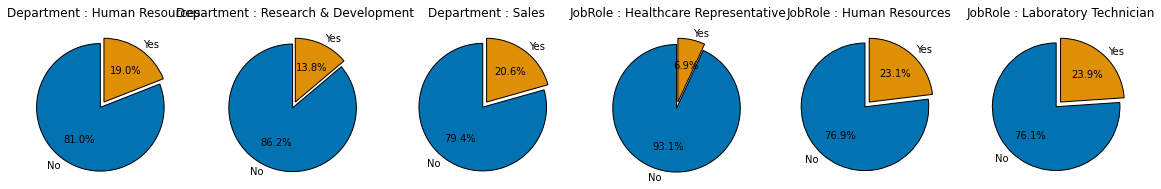

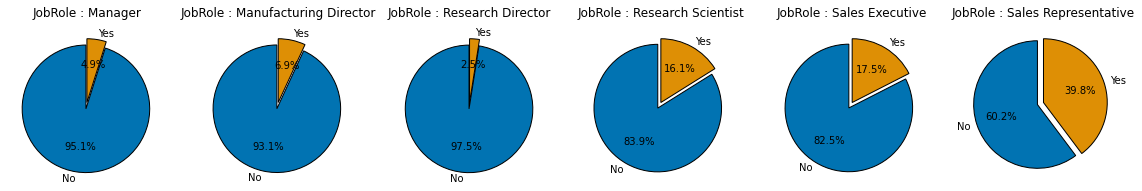

In [46]:
# Create a figuresize to store the subplots
fig = plt.subplots(nrows = 1,ncols = 6,figsize = (20,20))
# sort the unique values of 'Department' & 'JobRole' and 
# concatenate them together and store in a variable
c = list((sorted(df['Department'].unique()) + sorted(df['JobRole'].unique())[:3]))
# Iterate through the range of the length of c using a for loop
for i in range(len(c)):
    # within the loop, create a sunplot with the iterated value as the index and increment by 1
    plt.subplot(1,6,i+1)
    # using the if condition to filter the iterated values less than 3
    if i < 3:
        # perform this action, if i(iterated value) is < 3 and store in a variable
        l = list(df.loc[(df['Department'] == i)]['Attrition'].value_counts())
        # perform a mathematical operation to get the percentage of YES & NO of Department column
        circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]
    # If the first condition isnt satisfied, then perform the condition of iterated values > 2
    elif i > 2:
        # Get the value_counts of copied data of Jobrole equal to the (values in the loop,subtracted from 3)
        # and groupby the 'Attrition',then loc this back to the copied dataframe. 
        l = list(df.loc[(df['JobRole'] == (i - 3))]['Attrition'].value_counts())
        # perform the mathematical operation to get the percentage of YES & NO Attrition data in JobRole data
        circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]
    # plot a piechart
    plt.pie(circle,labels = list(tf['Attrition'][k] for k in sorted(df['Attrition'].unique())),autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),
            colors = colors, wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
    
    # Applying another if conditional statement for i < 3
    if i < 3:
        b = list(tf['Department'][k] for k in sorted(df['Department'].unique()))
        plt.title('Department : ' + b[i]);
    elif i > 2:
        b = list(tf['JobRole'][k] for k in sorted(df['JobRole'].unique()))
        plt.title('JobRole : ' + b[i-3]);

# creating another figsize for subplots       
fig = plt.subplots(nrows = 1,ncols = 6,figsize = (20,20))
# iterate through the range of the length of the sorted unique ''JobRole'' col,
# after the first 3 values
for i in range(len(sorted(df['JobRole'].unique())[3:])):
    # within the loop, create a sunplot with the iterated value as the index and increment by 1
    plt.subplot(1,6,i+1)
    # Get the value_counts of copied data of Jobrole equal to the (values in the loop,added to 3)
    # and groupby the 'Attrition',then loc this back to the copied dataframe. 
    l = list(df.loc[(df['JobRole'] == (i+3))]['Attrition'].value_counts())
    # perform the mathematical operation to get the percentage of YES & NO Attrition data in JobRole data
    circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]
    # plot a pie chart
    plt.pie(circle,labels = list(tf['Attrition'][k] for k in sorted(df['Attrition'].unique())),autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),
            colors = colors, wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
    b = list(tf['JobRole'][k] for k in sorted(df['JobRole'].unique()))
    plt.title('JobRole : ' + b[i+3]);

* From the above of pie charts, Sales & Human Resource Department employees have a high probability of getting attrited with the company than Research & Development.
* When it comes to JobRole, out of the 9 roles, 4 roles display less than 7% of attrition rate whereas the remaining 5 roles have an attrition rate more than 15%.

Conclusion: THis probably still points to monthlyincome or other related moneyissues in the company, like hikin their salary, because from analysis above, this fields are more employed than others. Maybe they leave due to the company not satisfying their needs

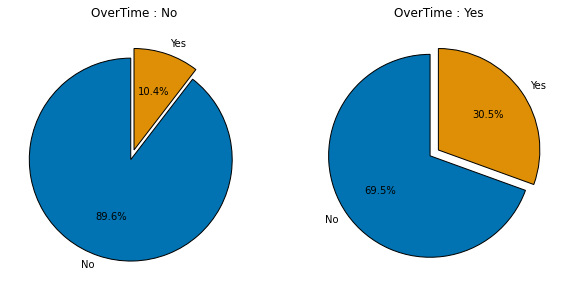

In [47]:
# Visualization of 'OverTime' w.r.t 'Attrition'(refer to previous plots  like this above for understanding)
fig = plt.subplots(nrows = 1, ncols = 2, figsize = (10,10))
for i in range(len(df['OverTime'].unique())):
    plt.subplot(1,2,i+1)
    l = list(df.loc[(df['OverTime'] == i)]['Attrition'].value_counts())
    circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]
    plt.pie(circle,labels = list(tf['Attrition'][k] for k in sorted(df['Attrition'].unique())),autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),
            colors = colors, wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
    b = list(tf['OverTime'][k] for k in sorted(df['OverTime'].unique()))
    plt.title('OverTime : ' + b[i]);

* The data shows that **people that work OverTime are prone to leave or discontinue from the company! It has a 30% attrition rate i.e very less as compared to employees that do not work OverTime**.

Conclusion: This seems like a likely factor, probably the employees that tend to work so often, arent recognised how they want to be and end up having a badworklife balance, so if they are refused after their efforts, they likely 'Quit'

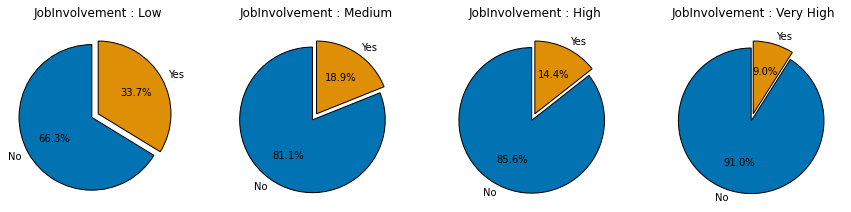

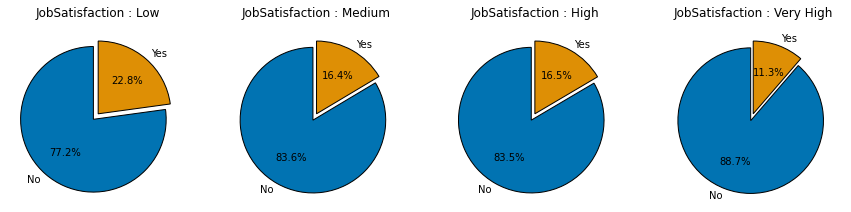

In [48]:
# Visualization of 'JobInvolvement' w.r.t 'Attrition'(refer to previous plots  like this above for understanding)
fig = plt.subplots(nrows = 1,ncols = 4,figsize = (15,15))
for i in range(len(df['JobInvolvement'].unique())):
    plt.subplot(1,4,i+1)
    l = list(df.loc[(df['JobInvolvement'] == (i+1))]['Attrition'].value_counts())
    circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]
    plt.pie(circle,labels = list(tf['Attrition'][k] for k in sorted(df['Attrition'].unique())),autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),
            colors = colors, wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
    plt.title('JobInvolvement : ' + ['Low', 'Medium', 'High', 'Very High'][i]);

# Visualization of 'JobSatisfaction' w.r.t 'Attrition'(refer to previous plots  like this above for understanding)
fig = plt.subplots(nrows = 1,ncols = 4,figsize = (15,15))
for i in range(len(df['JobSatisfaction'].unique())):
    plt.subplot(1,4,i+1)
    l = list(df.loc[(df['JobSatisfaction'] == (i+1))]['Attrition'].value_counts())
    circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]
    plt.pie(circle,labels = list(tf['Attrition'][k] for k in sorted(df1['Attrition'].unique())),autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),
            colors = colors, wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
    plt.title('JobSatisfaction : ' + ['Low', 'Medium', 'High', 'Very High'][i]);

* According to the data, **i observed that the higher employees JobInvolement, the lower the attrition rate!**
* Similar pattern can be observed for JobSatisfaction.

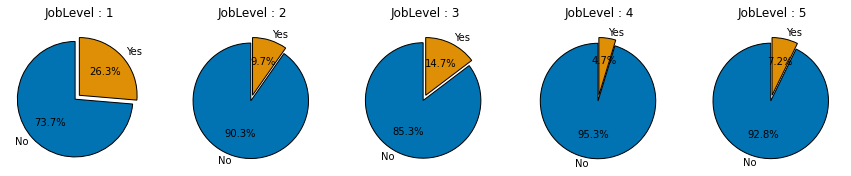

In [49]:
# Visualization of 'JobLevel' w.r.t 'Attrition'(refer to previous plots  like this above for understanding)
fig = plt.subplots(nrows = 1,ncols = 5,figsize = (15,15))

for i in range(len(df['JobLevel'].unique())):
    plt.subplot(1,5,i+1)
    l = list(df.loc[(df['JobLevel'] == (i+1))]['Attrition'].value_counts())
    circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]
    plt.pie(circle,labels = list(tf['Attrition'][k] for k in sorted(df1['Attrition'].unique())),autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),
            colors = colors, wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
    plt.title('JobLevel : ' + str(i+1));

* JobLevel 1 has the attrition rate with 26.3%. JobLevel 3 comes at the 2nd position with 14.7%.
* JobLevel 4 has the lowest attrition rate with 4.7%.
* **There seems to be no pattern. Hence, we will visualize the JobLevel with some features of the same group**.

# Employee - Company Information

* It includes features that provide information employee's association with the company!

* List of Features :
  * YearsAtCompany
  * YearsInCurrentRole
  * YearsWithCurrManager
  * YearsSinceLastPromotion
  * TrainingTimesLastYear
  * WorkLifeBalance

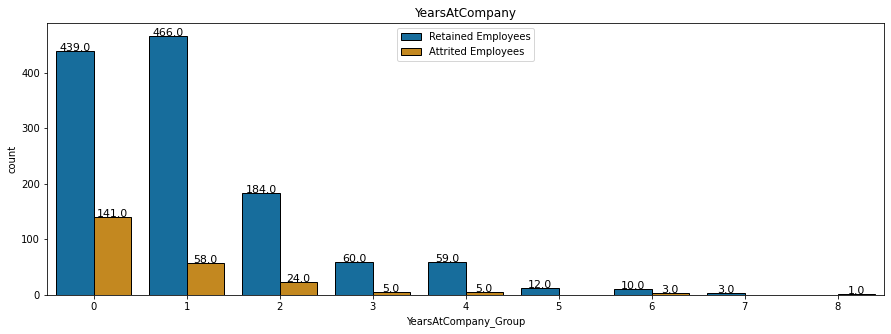

In [50]:
# Creating a 'YearsAtCompany' and instantiating it to the dummy dataframe 
df1['YearsAtCompany_Group'] = [int(i / 5) for i in df['YearsAtCompany']]
# creating a figsize
plt.figure(figsize = (15, 5))
# visualizing the grouped data w.r.t the 'Attrition' column
ax = sns.countplot('YearsAtCompany_Group', data = df1, hue = 'Attrition', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height()+0.01, rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.legend(['Retained Employees', 'Attrited Employees'])
plt.title('YearsAtCompany');

* Employees that have been at the company for 0 - 4 (0) years have been attrited the most number of times.
* As the employees gain experience at the company, attrition reduces.*italicized text*

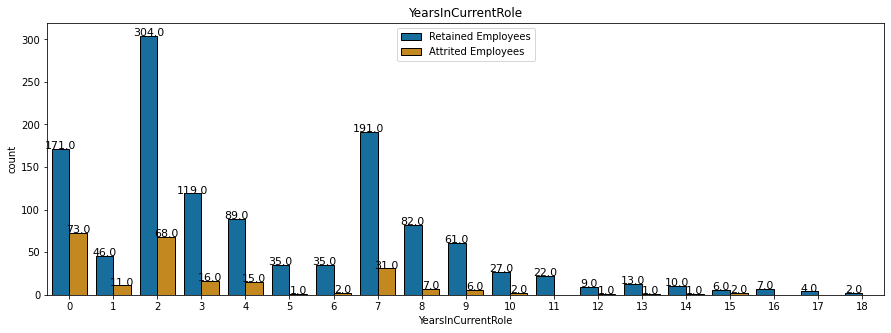

In [51]:
# Visualisation of 'YearsInCurrentRole' w.r.t 'Attrition' col
plt.figure(figsize = (15, 5))

ax = sns.countplot('YearsInCurrentRole', data = df, hue = 'Attrition', palette = colors,edgecolor = 'black');
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height()+0.01, rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.legend(['Retained Employees', 'Attrited Employees'])
plt.title('YearsInCurrentRole');

* From the data, i can observe that employees tend to not stay, i.e get **attrited** on their first role, probably due to pressure.
* Another spike of attrition is observed after 2years of being on same/current role, it might be due to employees pushing for promotion or higher salary or somekind of improvement or the company did an evaluation.
* This is followed by attrition in years 3 & 4, this might be same problem carried out in year 2.
* An important observation is employees with 7years on their belt, may face attrition, mostly by companies deciding to change things and bring in fresh blood.

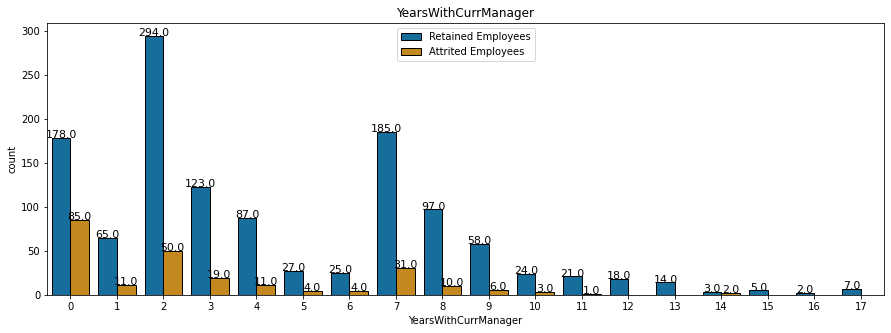

In [52]:
# Visualisation of 'YearsWithCurrentManager' w.r.t 'Attrition' col
plt.figure(figsize = (15, 5))

ax = sns.countplot('YearsWithCurrManager', data = df, hue = 'Attrition', palette = colors,edgecolor = 'black');
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height()+0.01, rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.legend(['Retained Employees', 'Attrited Employees'])
plt.title('YearsWithCurrManager');

* This is a very similar visualization to the previous graph of YearsInCurrentRole.
* Peaks of attrition can be found at the sames of : 0, 2 & 7.

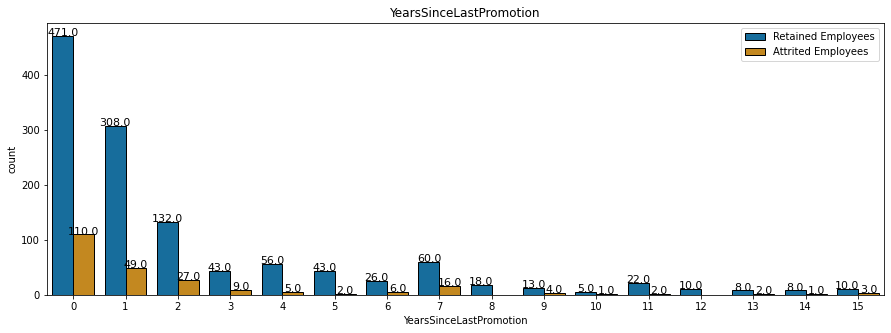

In [53]:
# Visualisation of 'YearsSinceLastPromotion' w.r.t 'Attrition' col
plt.figure(figsize = (15, 5))

ax = sns.countplot('YearsSinceLastPromotion', data = df, hue = 'Attrition', palette = colors,edgecolor = 'black');
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height()+0.01, rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.legend(['Retained Employees', 'Attrited Employees'])
plt.title('YearsSinceLastPromotion');

* From the data, i observe that a huge number of attrition cases can be found for value 0. this should be the majority values that  represent the new employees in the company.
* 1 & 2 years since the last promotion have also recorded a significant number of employee removal cases.
* 7 years since last promotion also has decent number of employee removal cases. 
This value seems to have some correlation with the previous 2 graphs of YearsInCurrentRole & YearsWithCurrManager.

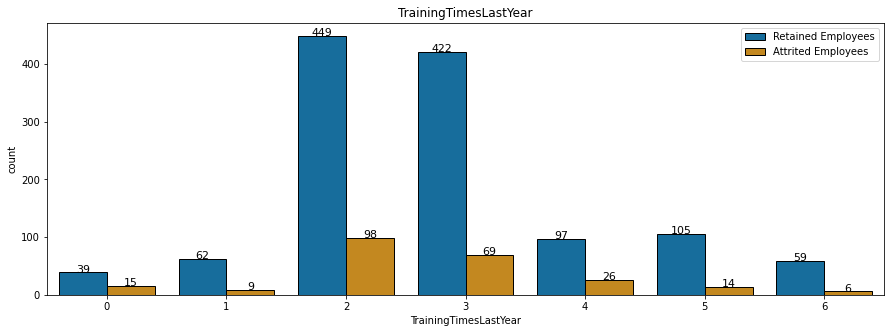

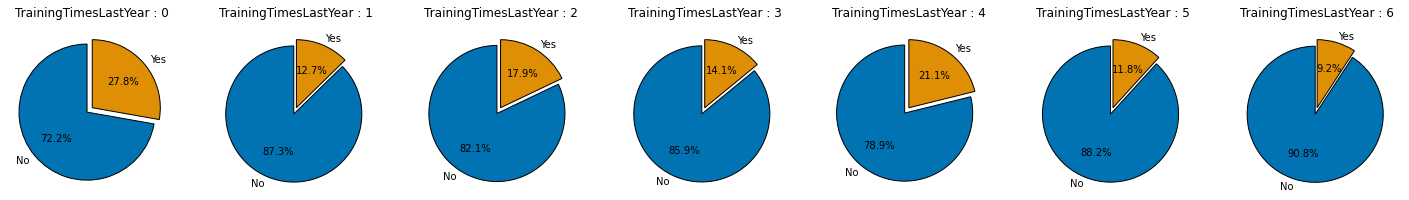

In [54]:
# Visualisation of 'TrainingTimesLastYear' w.r.t 'Attrition' col
plt.figure(figsize = (15, 5))

ax = sns.countplot('TrainingTimesLastYear', data = df, hue = 'Attrition', palette = colors,edgecolor = 'black');
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height()+0.01, rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.legend(['Retained Employees', 'Attrited Employees'])
plt.title('TrainingTimesLastYear');

# Visualisation of 'TrainingTimesLastYear' w.r.t 'Attrition' col
fig = plt.subplots(nrows = 1,ncols = 7,figsize = (25,25))

for i in range(len(df['TrainingTimesLastYear'].unique())):
    plt.subplot(1,7,i+1)
    l = list(df.loc[(df['TrainingTimesLastYear'] == (i))]['Attrition'].value_counts())
    circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]
    plt.pie(circle,labels = list(tf['Attrition'][k] for k in sorted(df['Attrition'].unique())),autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),
            colors = colors, wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
    plt.title('TrainingTimesLastYear : ' + str(i));



* Trainin times values of 3 & 4 have higher values but the attrition percentage tells us a different story.
* TrainingTimesLastYear : 0, TrainingTimesLastYear : 4 & TrainingTimesLastYear : 2 dominate the attrition percentage.
* It looks like training is very essential as the attrition percentage is very high when no training is conducted, 27.8%. Clearly, there is a competency problem.
* For TrainingTimesLastYear : 4, attrition percentage of 21.1% can be found which is high. Another point might be about the dificulty of the training & it's evaluation

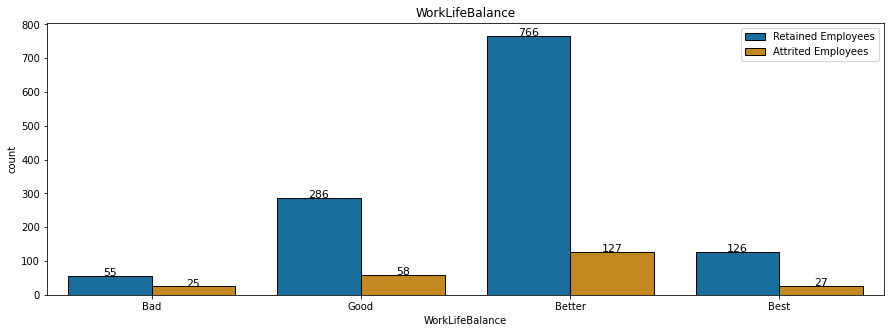

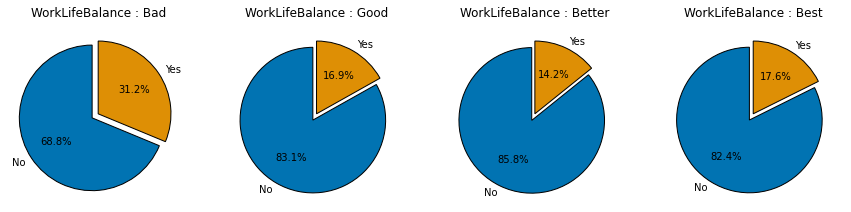

In [55]:
# Visualisation of 'WorkLifeBalance' w.r.t 'Attrition' col
plt.figure(figsize = (15, 5))

ax = sns.countplot('WorkLifeBalance', data = df, hue = 'Attrition', palette = colors,edgecolor = 'black');
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height()+0.01, rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.legend(['Retained Employees', 'Attrited Employees'])
ax.set_xticklabels(['Bad', 'Good', 'Better', 'Best'])
plt.title('WorkLifeBalance');

fig = plt.subplots(nrows = 1,ncols = 4,figsize = (15,15))

for i in range(len(df['WorkLifeBalance'].unique())):
    plt.subplot(1,4,i+1)
    l = list(df.loc[(df['WorkLifeBalance'] == (i+1))]['Attrition'].value_counts())
    circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]
    plt.pie(circle,labels = list(tf['Attrition'][k] for k in sorted(df['Attrition'].unique())),autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),
            colors = colors, wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
    plt.title('WorkLifeBalance : ' + ['Bad', 'Good', 'Better', 'Best'][i]);

* As expected Bad WorkLifeBalance has resulted in a massive attrition percentage of 31.2%.
* Surprisingly, Best WorkLifeBalance has the 2nd highest value of attrition percentage.
* i will perform futher visuals of the WorkLifeBalance feature with the JobRole & JobLevel features of the Employee Job Information!

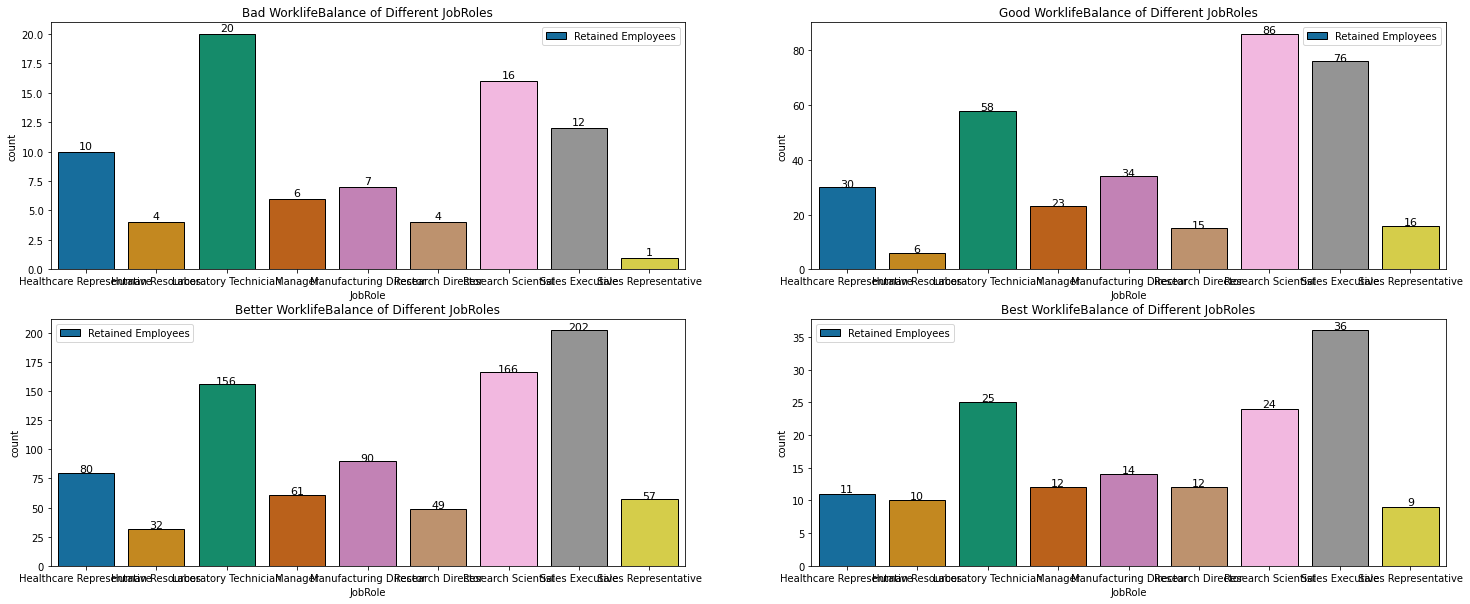

In [56]:
# Visualisation of JobRole against worklifebalance using countplot
fig = plt.subplots(nrows = 2, ncols = 2, figsize = (25,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    ax = sns.countplot('JobRole', data = df[df['WorkLifeBalance'] == (i+1)], palette = colors, edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 0.25, rect.get_height(), horizontalalignment='center', fontsize = 11)
    ax.set_xticklabels(tf['JobRole'][k] for k in sorted(df[df['WorkLifeBalance'] == (i+1)]['JobRole'].unique()))
    plt.legend(['Retained Employees', 'Attrited Employees'])
    plt.title(['Bad', 'Good', 'Better', 'Best'][i] + ' WorklifeBalance of Different JobRoles');

* Laboratory Technician, Research Scientist & Sales Executive have recorded high numbers for all the values of WorkLifeBalance.
* I observe that rhis three Lab Technicians tend to have just an average fair of worklifebalance, and it seems this three groups of people are very important to the company.

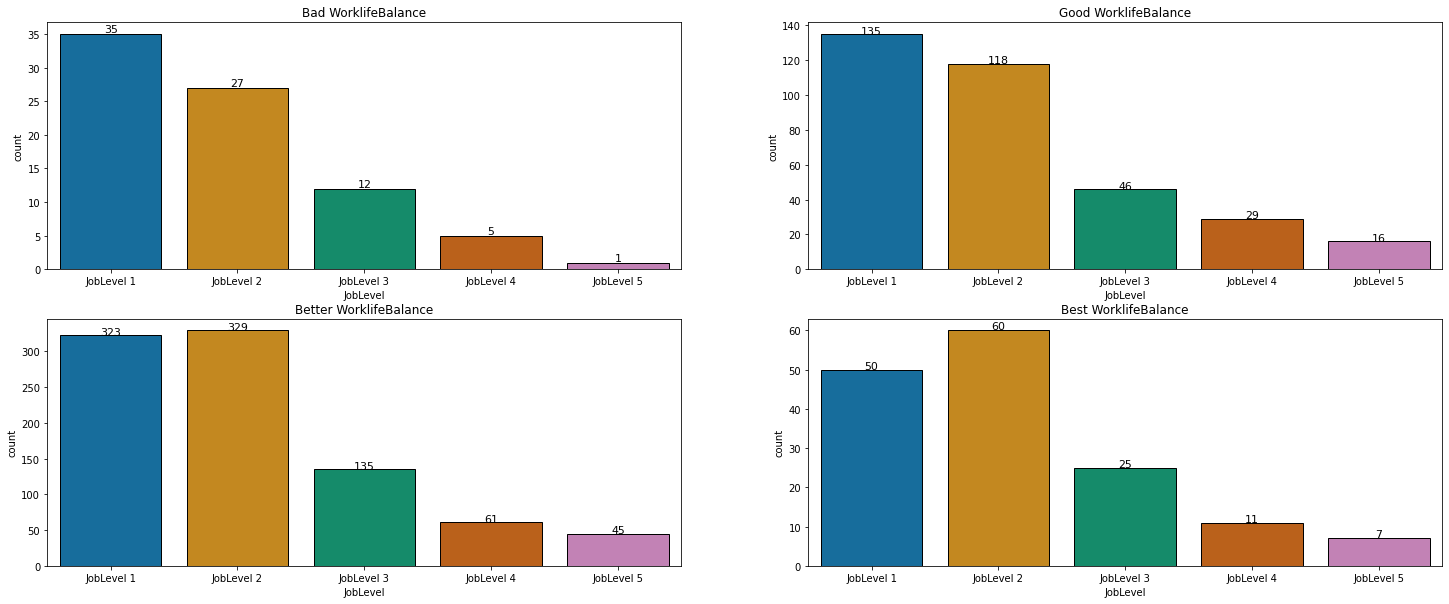

In [57]:
# Visualisation of JobLevel against worklifebalance using countplot
fig = plt.subplots(nrows = 2, ncols = 2, figsize = (25,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    ax = sns.countplot('JobLevel', data = df[df['WorkLifeBalance'] == (i+1)], palette = colors, edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 0.25, rect.get_height(), horizontalalignment='center', fontsize = 11)
    ax.set_xticklabels(['JobLevel 1', 'JobLevel 2', 'JobLevel 3', 'JobLevel 4', 'JobLevel 5'])
    plt.title(['Bad', 'Good', 'Better', 'Best'][i] + ' WorklifeBalance');

* There seem to be no relationship btw the level of an employees job and his worklifebalance, because JobLevel 1 & JobLevel 2 record high values in for all the WorkLifeBalance values.

# Company Features :
* It includes features that provide information company's characteristics w.r.t employees!

* List of Features :
    * PercentSalaryHike
    * StockOptionLevel
    * BusinessTravel
    * PerformanceRating
    * EnvironmentSatisfaction
    * RelationshipSatisfaction

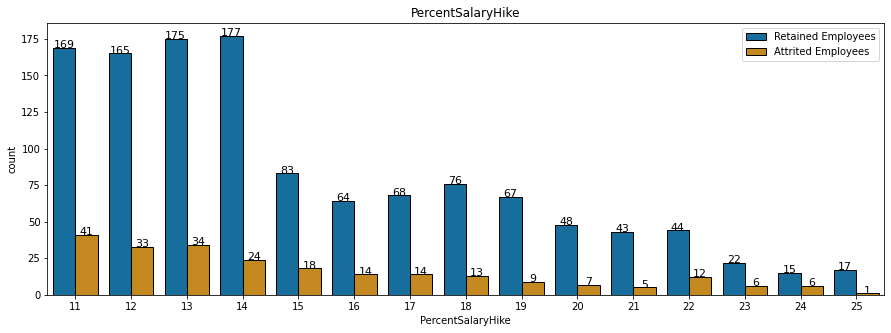

In [58]:
# Visualisation of PercentSalaryHike w.r.t 'Attrition' using countplot
plt.figure(figsize = (15, 5))
ax = sns.countplot('PercentSalaryHike', data = df, hue = 'Attrition', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height()+0.01, rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.legend(['Retained Employees', 'Attrited Employees'])
plt.title('PercentSalaryHike');

* I observe that low salary hikes of 11 - 14 have been given to a lot of employees and hence the attrition is high as well.
* As the PercentSalaryHike increases, number of attrited employees decrease!

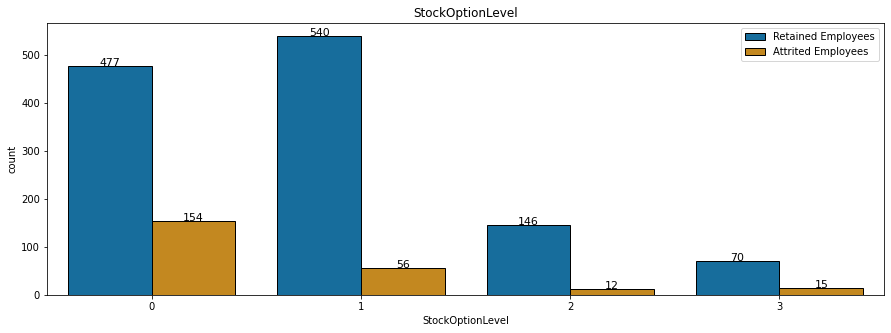

In [59]:
# Visualisation of StockOptionLevel w.r.t 'Attrition' using countplot
plt.figure(figsize = (15, 5))
ax = sns.countplot('StockOptionLevel', data = df, hue = 'Attrition', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height()+0.01, rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.legend(['Retained Employees', 'Attrited Employees'])
plt.title('StockOptionLevel');

* This plot shows that the lower or if no StockOptionLevel, the higher the attrition rate.
* Number of employees reduces StockOptionLevel increases

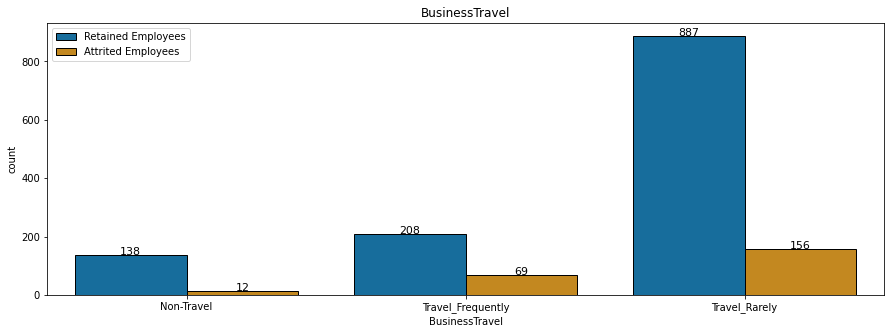

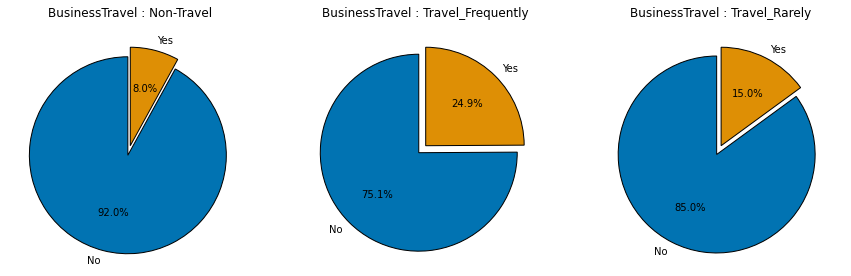

In [60]:
 # Visualisation of BusinessTravel w.r.t 'Attrition' using countplot
plt.figure(figsize = (15, 5))
ax = sns.countplot('BusinessTravel', data = df, hue = 'Attrition', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height()+0.01, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels([tf['BusinessTravel'][k] for k in sorted(df['BusinessTravel'].unique())])
plt.legend(['Retained Employees', 'Attrited Employees'])
plt.title('BusinessTravel');

# creating another figsize
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (15,15))
for i in range(len(df['BusinessTravel'].unique())):
    plt.subplot(1,3,i+1)
    l = list(df.loc[(df['BusinessTravel'] == i)]['Attrition'].value_counts())
    circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]
    plt.pie(circle,labels = list(tf['Attrition'][k] for k in sorted(df1['Attrition'].unique())),autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),
            colors = colors, wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
    plt.title('BusinessTravel : ' + tf['BusinessTravel'][i]);

* i can see that the number of employees that Travel_Rarely is huge as compared to Non-Travel & Travel_Frequently.
* When it comes to attrition rate, Travel_Frequently employees have a 25% probability of being removed from the company or quiting the company. maybe they could be employees based on contracts

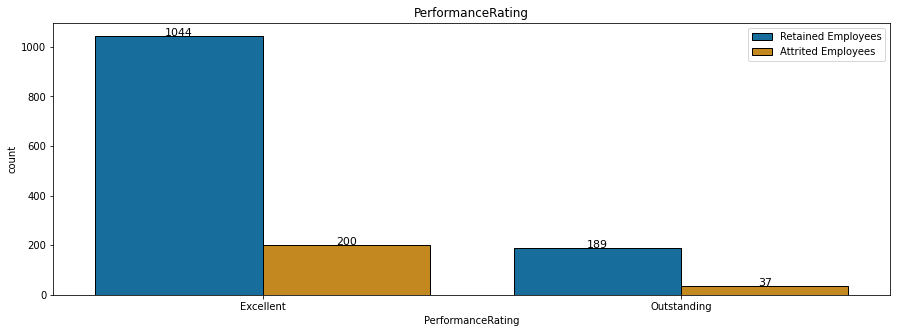

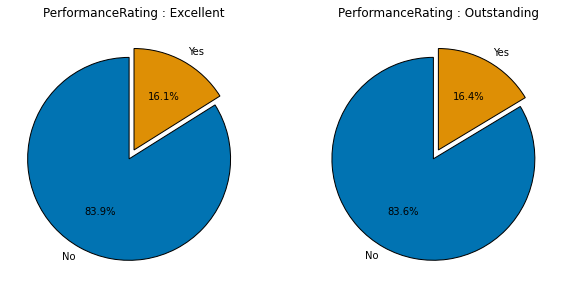

In [61]:
# Visualisation of PerformanceRating w.r.t 'Attrition' using countplot
plt.figure(figsize = (15, 5))
ax = sns.countplot('PerformanceRating', data = df, hue = 'Attrition', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height()+0.01, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['Excellent', 'Outstanding'])
plt.legend(['Retained Employees', 'Attrited Employees'])
plt.title('PerformanceRating');

# craeting a figsize
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (10,10))

for i in range(len(df['PerformanceRating'].unique())):
    plt.subplot(1,2,i+1)
    l = list(df.loc[(df['PerformanceRating'] == (i+3))]['Attrition'].value_counts())
    circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]
    plt.pie(circle,labels = list(tf['Attrition'][k] for k in sorted(df['Attrition'].unique())),autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),
            colors = colors, wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
    plt.title('PerformanceRating : ' + ['Low', 'Good', 'Excellent', 'Outstanding'][i+2]);


* According to the data, more employees are rated with excellent than outstanding, probably due to the nature of the work, it isnt easy to hit perfect
* Though in attrition rate, the values are very close, with 16.1% & 16.4% which is quite small compared to the number of retained employees
* No data is being recorded forLow & Good PerformanceRating.

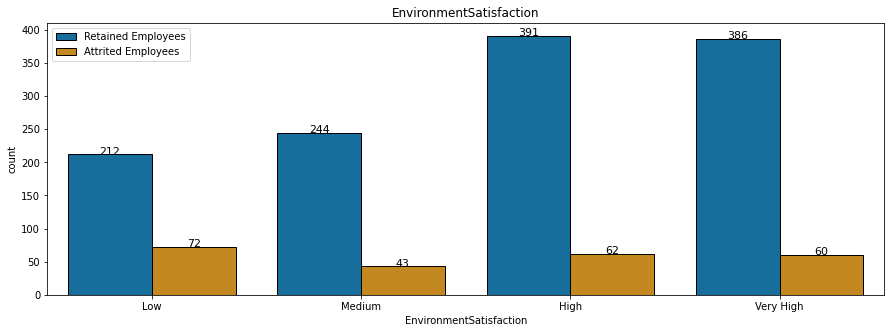

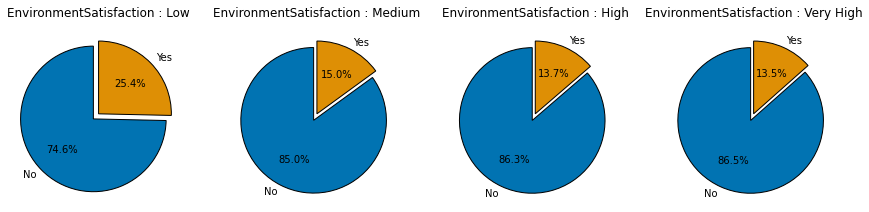

In [62]:
# Visualisation of 'EnvironmentSatisfaction' w.r.t 'Attrition' using countplot
plt.figure(figsize = (15, 5))
ax = sns.countplot('EnvironmentSatisfaction', data = df, hue = 'Attrition', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height()+0.01, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['Low', 'Medium', 'High', 'Very High'])
plt.legend(['Retained Employees', 'Attrited Employees'])
plt.title('EnvironmentSatisfaction');

# creating a figsize
fig = plt.subplots(nrows = 1,ncols = 4,figsize = (15,15))

for i in range(len(df['EnvironmentSatisfaction'].unique())):
    plt.subplot(1,4,i+1)
    l = list(df.loc[(df['EnvironmentSatisfaction'] == (i+1))]['Attrition'].value_counts())
    circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]
    plt.pie(circle,labels = list(tf['Attrition'][k] for k in sorted(df['Attrition'].unique())),autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),
            colors = colors, wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
    plt.title('EnvironmentSatisfaction : ' + ['Low', 'Medium', 'High', 'Very High'][i]);

* Its observed from the two plots above that, the better/higher the environment satisfaction, the lower the attrition rate, vice versa



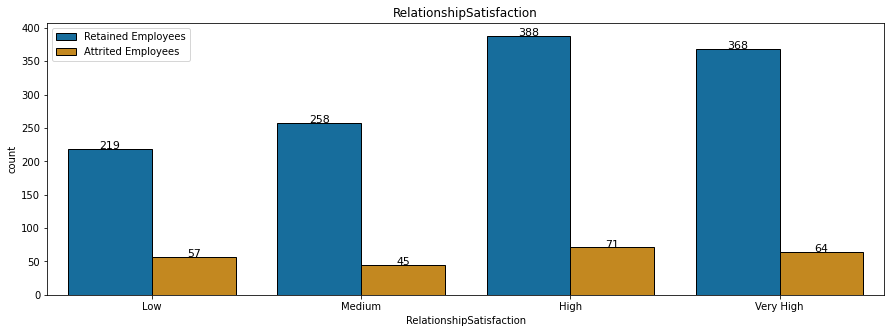

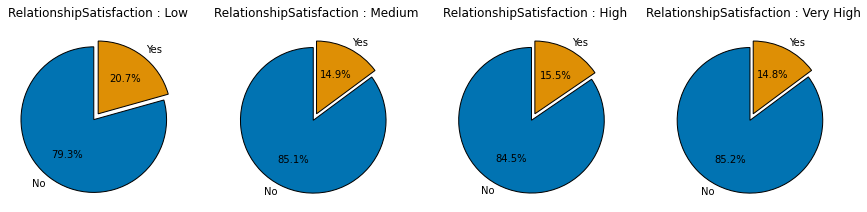

In [63]:
# Visualisation of 'RelationshipSatisfaction' w.r.t 'Attrition' using countplot
plt.figure(figsize = (15, 5))
ax = sns.countplot('RelationshipSatisfaction', data = df, hue = 'Attrition', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height()+0.01, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['Low', 'Medium', 'High', 'Very High'])
plt.legend(['Retained Employees', 'Attrited Employees'])
plt.title('RelationshipSatisfaction');

# creating a fig size for the subplots of the piechat
fig = plt.subplots(nrows = 1,ncols = 4,figsize = (15,15))

for i in range(len(df['RelationshipSatisfaction'].unique())):
    plt.subplot(1,4,i+1)
    l = list(df.loc[(df['RelationshipSatisfaction'] == (i+1))]['Attrition'].value_counts())
    circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]
    plt.pie(circle,labels = list(tf['Attrition'][k] for k in sorted(df['Attrition'].unique())),autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),
            colors = colors, wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
    plt.title('RelationshipSatisfaction : ' + ['Low', 'Medium', 'High', 'Very High'][i]);

* The visualisation of RelationshipSatisfaction is similar to EnvironmenSatisfaction as the better the relationship with coworkers and managers, the lower the possibility of high attrition

# Finances :
* It includes features that provide information about employee finances!

* List of Features :
  * MonthlyIncome
  * HourlyRate
  * DailyRate
  * MonthlyRate

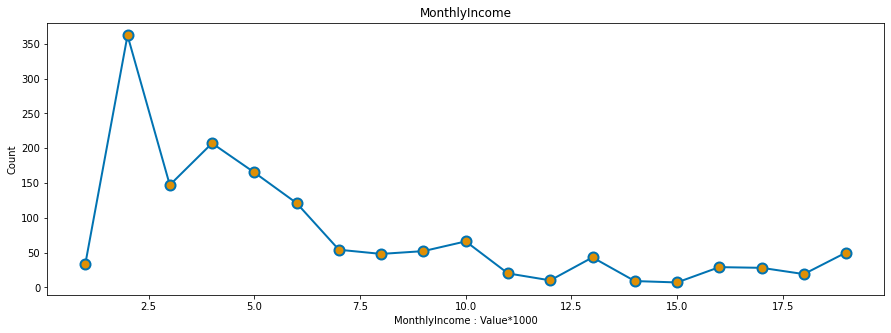

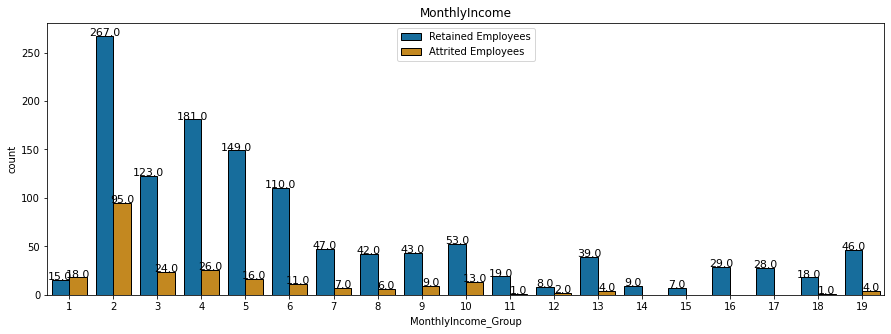

In [64]:
df1['MonthlyIncome_Group'] = [int(i / 1000) for i in df['MonthlyIncome']]
v1 = [df1['MonthlyIncome_Group'].value_counts()[i] for i in sorted(df1['MonthlyIncome_Group'].value_counts().index)]

# First figsize of a lineplots visualisation
plt.figure(figsize = (15,5))
ax = sns.lineplot(x = sorted(df1['MonthlyIncome_Group'].value_counts().index), y = v1, lw = 2, color = colors[0], marker = 'o', 
                  markersize = 10, markerfacecolor = colors[1], markeredgewidth = 2, markeredgecolor = colors[0], )
plt.xlabel('MonthlyIncome : Value*1000'); plt.ylabel('Count')
plt.title("MonthlyIncome");

# Second figsize of a countplot visualization
plt.figure(figsize = (15, 5))
ax = sns.countplot('MonthlyIncome_Group', data = df1, hue = 'Attrition', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height()+0.01, rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.legend(['Retained Employees', 'Attrited Employees'])
plt.title('MonthlyIncome');


* The graph highlights an overall decline in the count of the values.
* MonthlyIncome values between 1000 - 2000 are present in high numbers. Values between 3000 - 4000 comes second with more than 200 values present in this range. This group have a very high possibility of attrition
*Monthly income seems of a factor of attrition

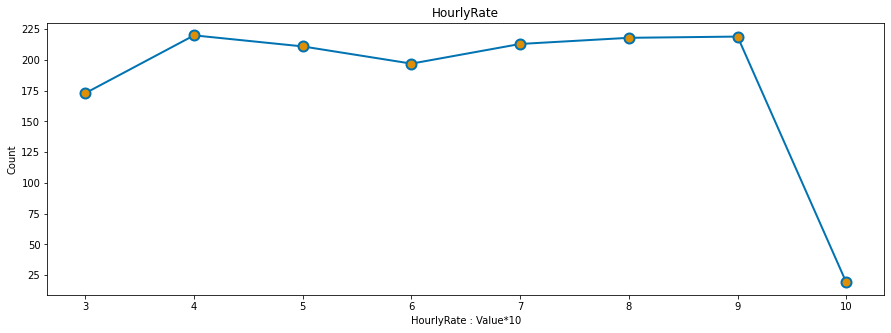

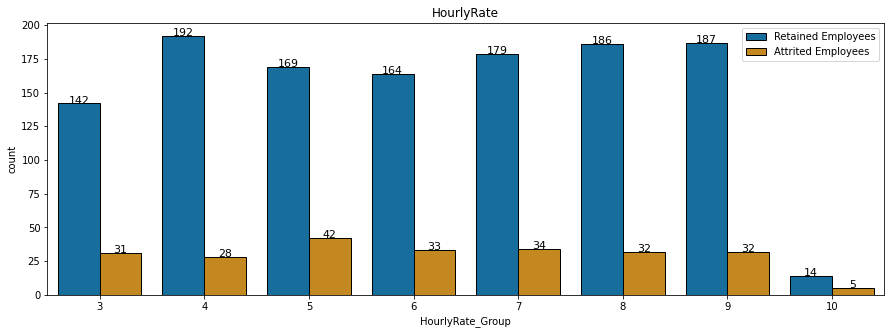

In [65]:
# Visualisation of the grouped values of HourltRate using a lineplot and countplot to plot.
df1['HourlyRate_Group'] = [int(i / 10) for i in df['HourlyRate']]
v1 = [df1['HourlyRate_Group'].value_counts()[i] for i in sorted(df1['HourlyRate_Group'].value_counts().index)]

plt.figure(figsize = (15,5))
ax = sns.lineplot(x = sorted(df1['HourlyRate_Group'].value_counts().index), y = v1, lw = 2, color = colors[0], marker = 'o', 
                  markersize = 10, markerfacecolor = colors[1], markeredgewidth = 2, markeredgecolor = colors[0], )
plt.xlabel('HourlyRate : Value*10'); plt.ylabel('Count')
plt.title("HourlyRate");

plt.figure(figsize = (15, 5))
ax = sns.countplot('HourlyRate_Group', data = df1, hue = 'Attrition', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height()+0.01, rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.legend(['Retained Employees', 'Attrited Employees'])
plt.title('HourlyRate');

* For HourlyRate, values between 30 - 100 are present with a count of more than 175+ each.
* Attrition rate of these values is also low and very close to each other.
* For HourlyRate of more than 100, very few values are present and hence attrition is high as well.

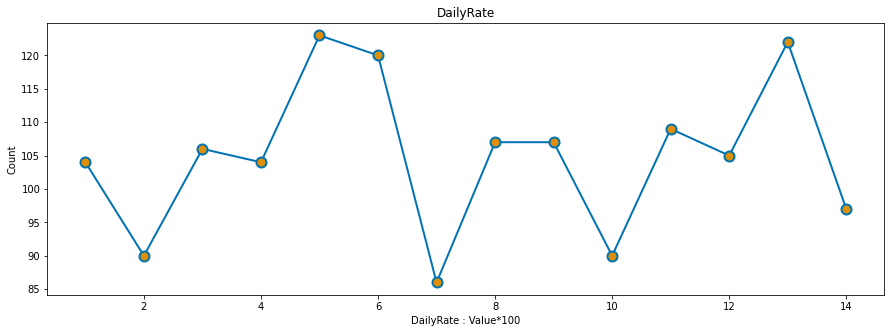

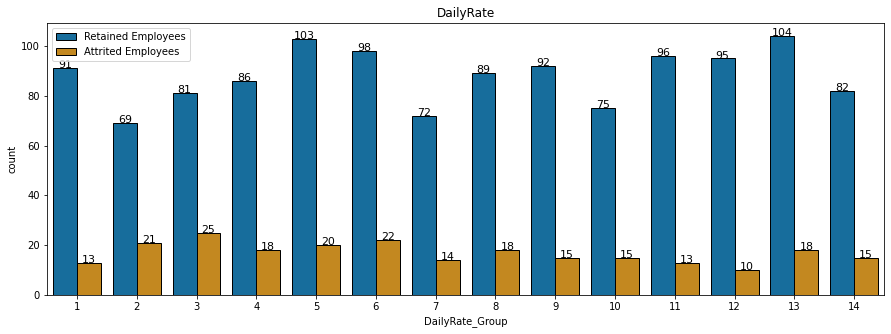

In [66]:
# Visualisation of the grouped values of DailytRate using a lineplot and countplot to plot.
df1['DailyRate_Group'] = [int(i / 100) for i in df['DailyRate']]
v1 = [df1['DailyRate_Group'].value_counts()[i] for i in sorted(df1['DailyRate_Group'].value_counts().index)]

plt.figure(figsize = (15,5))
ax = sns.lineplot(x = sorted(df1['DailyRate_Group'].value_counts().index), y = v1, lw = 2, color = colors[0], marker = 'o', 
                  markersize = 10, markerfacecolor = colors[1], markeredgewidth = 2, markeredgecolor = colors[0], )
plt.xlabel('DailyRate : Value*100'); plt.ylabel('Count')
plt.title("DailyRate");

plt.figure(figsize = (15, 5))
ax = sns.countplot('DailyRate_Group', data = df1, hue = 'Attrition', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height()+0.01, rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.legend(['Retained Employees', 'Attrited Employees'])
plt.title('DailyRate');

* No much observations here, no trend also. But number of attrited employees is close to each other. Certain drop in count of values are present.
* Values between 600 - 700 have the lowest count.

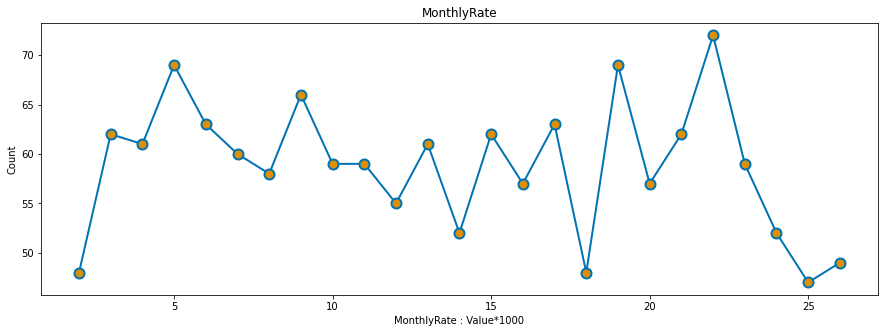

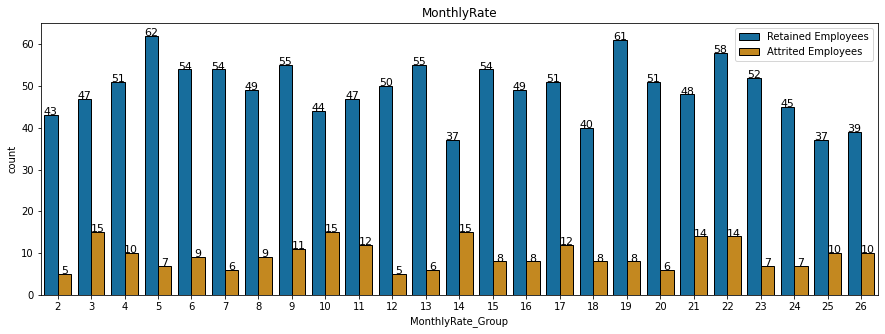

In [67]:
# Visualisation of the grouped values of MonthltRate using a lineplot and countplot to plot.
df1['MonthlyRate_Group'] = [int(i / 1000) for i in df['MonthlyRate']]
v1 = [df1['MonthlyRate_Group'].value_counts()[i] for i in sorted(df1['MonthlyRate_Group'].value_counts().index)]

plt.figure(figsize = (15,5))
ax = sns.lineplot(x = sorted(df1['MonthlyRate_Group'].value_counts().index), y = v1, lw = 2, color = colors[0], marker = 'o', 
                  markersize = 10, markerfacecolor = colors[1], markeredgewidth = 2, markeredgecolor = colors[0], )
plt.xlabel('MonthlyRate : Value*1000'); plt.ylabel('Count')
plt.title("MonthlyRate");

plt.figure(figsize = (15, 5))
ax = sns.countplot('MonthlyRate_Group', data = df1, hue = 'Attrition', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height()+0.01, rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.legend(['Retained Employees', 'Attrited Employees'])
plt.title('MonthlyRate');

* Values of attrited employees are very close to each other.
* Values between 21000 - 22000 have the highest count.

## Checking features of Finances with Department & JobLevel features of Employee Job Information.

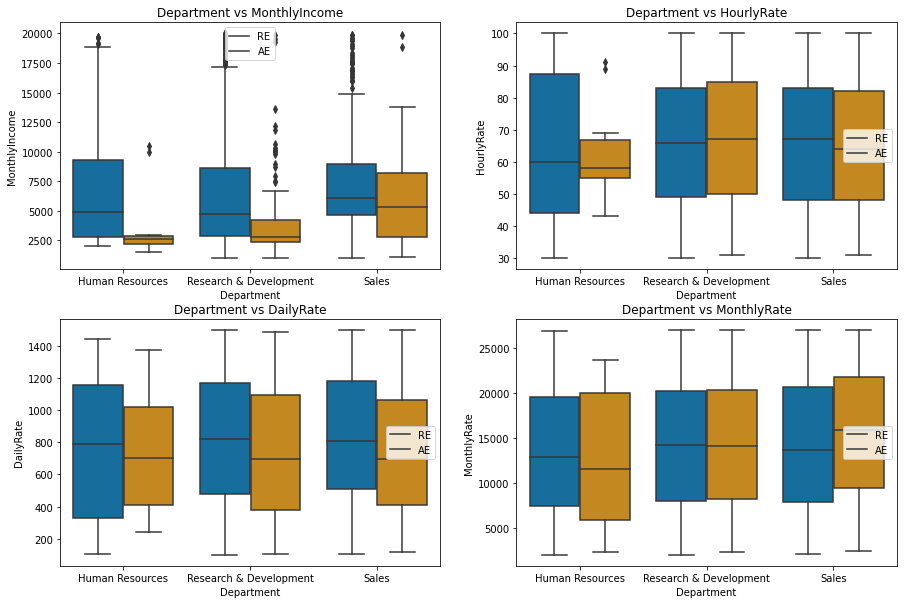

In [68]:
# Creating a figsize with subplots
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (15,10))
# iterate through a range of the length of 'l5'(created earlier)
for i in range(len(l5)):
    plt.subplot(2,2,i+1)
    # use a boxplot to visualize department against each of the iterated values w.r.t attrition column
    ax = sns.boxplot(x = 'Department', y = l5[i], data = df, hue = 'Attrition',palette = colors);
    plt.legend(['RE', 'AE'])
    ax.set_xticklabels([tf['Department'][k] for k in sorted(df['Department'].unique())])
    plt.title('Department vs ' + l5[i]);

* MonthlyIncome has too many outlier values. These outliers are probably from the JobLevel 5 which is low in numbers & attrition rate.
* For HourlyRate, Research & Development & Sales department pretty much occupy the same range of values for attrition & non-attrition. Range of attrition values for Human Resources is very small.
* Similar to HourlyRate, same pattern can be observed for Research & Development & Sales department for DailyRate & MonthlyRate.

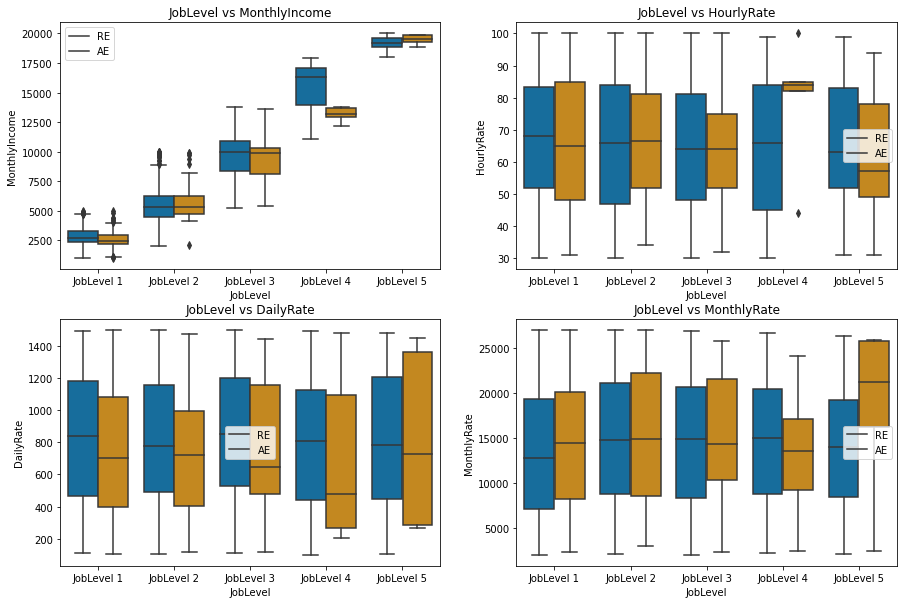

In [69]:
# Creating a figsize with subplots
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (15,10))
# iterate through a range of the length of 'l5'(created earlier)
for i in range(len(l5)):
    plt.subplot(2,2,i+1)
    # use a boxplot to visualize department against each of the iterated values w.r.t attrition column
    ax = sns.boxplot(x = 'JobLevel', y = l5[i], data = df, hue = 'Attrition',palette = colors);
    plt.legend(['RE', 'AE'])
    ax.set_xticklabels(['JobLevel 1', 'JobLevel 2', 'JobLevel 3', 'JobLevel 4', 'JobLevel 5'])
    plt.title('JobLevel vs ' + l5[i]);

* As the JobLevel increases, MonthlyIncome increases! The upper limit value of the previous JobLevel value is lower than the lower limit value of the succeding JobLevel value.
* Upper limit values of JobLevel of HourlyRate are very close to each other. It does not display a significant difference to separate out as MonthlyIncome.
*  Pretty much same thing can be observed for DailyRate & MonthlyRate. JobLevel 5's DailyRate & MonthlyRate upper limit is clearly differentiable.
Summary of EDA

# Summary of Insights / Order / Values of features w.r.t target variable (Attrition) :

* General Employee Information :

  * Age : 20 - 44
  * Gender: Male > Female
  * MaritalStatus : Single > Married > Divorced
  * Education : Below College > Bachelor > College > Master > Doctor
  * DistanceFromHome : 20 - 24 > 15 - 19 > 25 - 29 > 10 - 14 > 5 - 9
  * TotalWorkingYears : Very high chances during the 1st 10 working years
  * NumCompaniesWorked : High chances during 1st - 2nd job. Chances increase by a huge margin after working in 4th company.

* Employee Job Information :

    * EducationField : Human Resources > Technical Degree > Marketing > Life Sciences > Medical > Other
    * Department : Sales > Human Resources > Reasearch & Development
    * JobLevel : JobLevel 1 > JobLevel 3 > JobLevel 2 > JobLevel 5 > JobLevel 4. We can see that the JobRoles with high attrition rate are present in the JobLevel with high attrition rate.
    * JobRole : Sales Representative > Laboratory Technician > Human Resources > Sales Executive > Research Scientist > Healthcare Representative = Manufacturing Director > Manager > Research Director
    * JobInvolvement : Low > Medium > High > Very High
    * OverTime : Yes > No* nJobSatisfaction : : Low > Medium > High > Very High



* Employee Company Information :

    * YearsAtCompany : 0 - 4 > 5 - 9 > 10 - 14 >
    * YearsInCurrentRole : Some peaks of high attrition values without any pattern is found.
    * YearsWithCurrManager : Some peaks of high attrition values without any pattern is found.
    * YearsSinceLastPromotion : 0 > 1 > 2. Some other peaks are also found with significant values.
    * TrainingTimesLastYear : 0 > 4 > 2 > 3 > 1 > 5 > 6
    * WorkLifeBalance : Bad > Best > Good > Better

* Company Features :

    * PercentSalaryHike : 11 - 14 has the highest attrition rate. As the value increases, number of attrited employees decrease.
    * StockOptionLevel : Number of employees reduces as the StockOptionLevel increases.
    * BusinessTravel : Travel_Frequently > Travel_Rarely > Non-Travel
    * PerformanceRating : Excellent = Outstanding. No values of Low & Good recorded.
    * EnvironmentSatisfaction : Low > Medium > High > Very High
    * RelationshipSatisfaction : Low > High > Medium > Very High

* Finances :

    * MonthlyIncome : 2000 - 3000
    * HourlyRate : 50 - 60. Values are very close to each other.
    * DailyRate : 300 - 400. Values are very close to each other.
    * MonthlyRate : Very close and small peaks are present.

# Now to just add to my analysis, i would perform a heatmap analysis. to see if this factors have strong correlation with attition

In [70]:
df.head()

,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,1,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,2,49,0,1,279,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,3,37,1,2,1373,1,2,2,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,4,33,0,1,1392,1,3,4,1,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,5,27,0,2,591,1,2,1,3,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


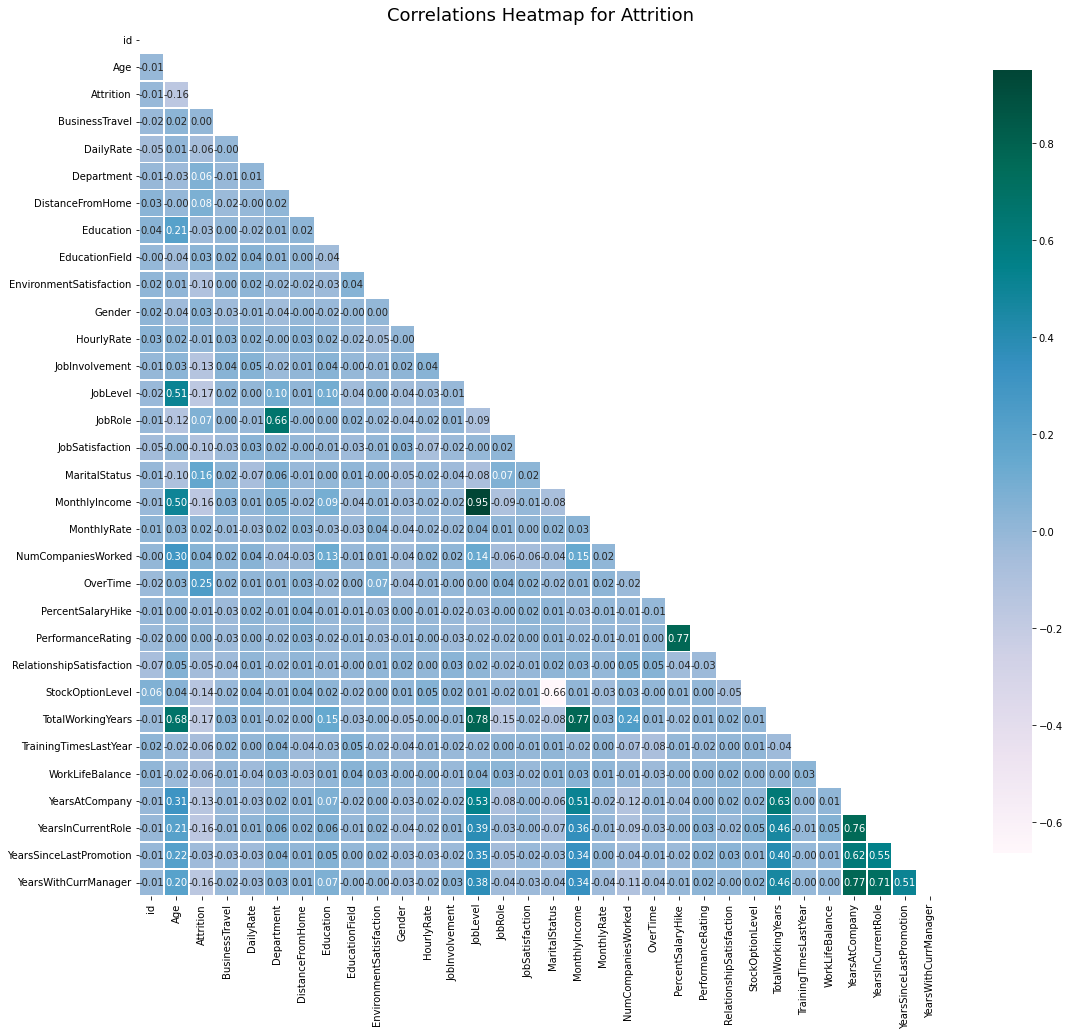

In [71]:
# checking a correlation of the entire data and assign to a variable
corr = df.corr()
# using a numpy method (np.ones) i.e  by default returns ones for all the data
ones = np.ones_like(corr, dtype='bool') 
# create a mask that returns a triangle like shape of the ones data
mask = np.triu(ones)
# create figsize subplots
fig, ax = plt.subplots(figsize=(18,16))
# using seaborn heatmap to visaulize the corr data
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='PuBuGn', linewidths=.6, cbar_kws={'shrink':.9})
ax.xaxis.tick_bottom()
plt.title("Correlations Heatmap for Attrition", fontdict={'fontsize': 18}, loc='center');

* According to the data visualiizations above, some of the insights i drew from the analysis can lead to attrition!. But with this heatmap correlation, i can clearly see some truth from my earlier visualisations, but the correlations are very weak against 'Attrition'. Tho, the three factors both with heatmap correlation and my earlier analysis are:
 
 * Overtime
 * TotalWorkingYears and
 * Joblevel

#### 2) Relationship Between Education and Monthly Income?

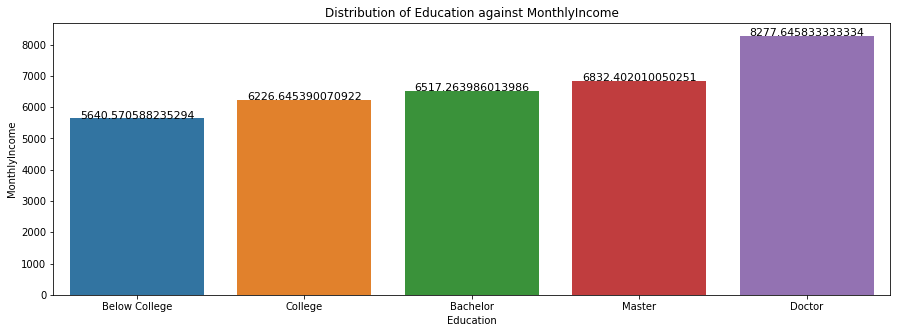

In [72]:
# Visualization of 'Education' w.r.t 'MonthlyIncome' column using a countplot
plt.figure(figsize = (15,5))
ax = sns.barplot(x = 'Education', y = 'MonthlyIncome', data = df, ci=None)
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['Below College', 'College', 'Bachelor', 'Master', 'Doctor'])
plt.title('Distribution of Education against MonthlyIncome');

* This shows that there is a clearly relationship between the degrees of education and income they recieve monthly, this could cause attrition in a company.
* The higher the degree, the higher income


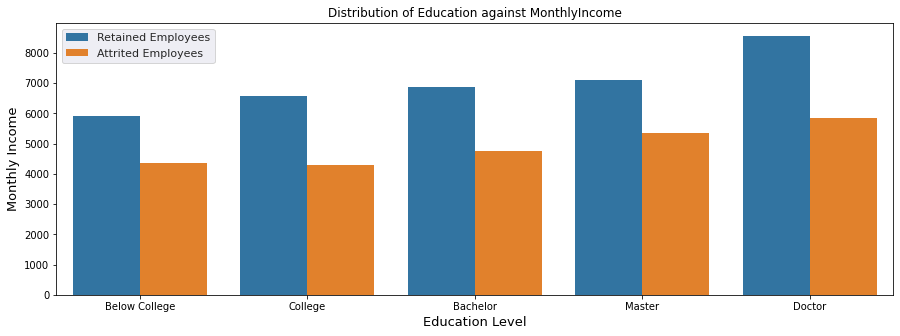

In [73]:
plt.figure(figsize = (15,5))
ax = sns.barplot(x = 'Education', y = 'MonthlyIncome', hue = 'Attrition', data = df, ci=None)
sns.set(rc={'figure.figsize':(16,8)})
ax.set_xticklabels(['Below College', 'College', 'Bachelor', 'Master', 'Doctor'])
plt.xlabel('Education Level',fontsize=13)
plt.ylabel("Monthly Income",fontsize= 13)
plt.legend(['Retained Employees', 'Attrited Employees'])
plt.title('Distribution of Education against MonthlyIncome');

* From the chart above, its seen that employees that are retained, are always higher than the employees that are attrited in every level.

* Conclusion: In every level, the income of the retained employees are more than that of the attrited employees. this could be a factor that in every level, some employees are paid higher than their colleagues.

* Limitation: The count of those that stayed are more than 5 times those that left.
This is a good representaion together against Attrition, but there are other correlated and analysed factors as to why employees leave the company.

#### 2. What is the effect of age on Attrition?

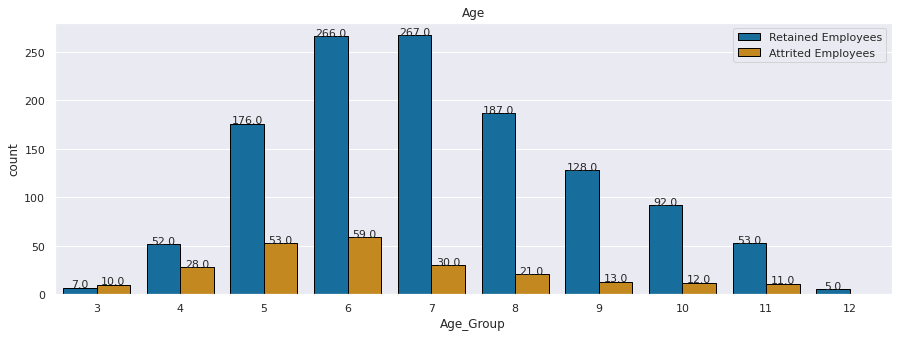

In [76]:
# Iterate over Áge column in the copied dataframe, divide the value by 5
#(this is to group them according to the divided result e.g 18/5 = 3.6),
# after each iteration, and convert it from float to an integer, and instantiate it
# to the dummy dataframe.
df1['Age_Group'] = [int(i/5) for i in df['Age']]
# create a figsize
plt.figure(figsize = (15,5))
# use countplot to visualize the Age_group w.r.t 'Attrition'
ax = sns.countplot('Age_Group', data = df1, hue = 'Attrition', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 11)
    # Add a legend 
plt.legend(['Retained Employees', 'Attrited Employees'], loc = 'upper right')
plt.title('Age');

* In the Age_grouped chart above, those grouped in 3(18 % 19) have more attritted employees than retained employees.
* Those grouped in 4(20-24), 5(25-29), 6(30-35), have high counts of attrition, tho the people who were retained have higher counts
* The data shows that from group 6 above, the attrition rate decreases.

**Conclusion**, this could mean age has an effect on attrition but alongside other attributes, which could certainly lead to being a factor.
* Yes, age has an effect on attrition i the company, but not neccessarily the underlying factor to attrition.

In [77]:
# checking the description of age w.r.t 'No' AAttrition
RE_age =df.query('Attrition == 0')['Age'].describe()
RE_age

count   1233.00
mean      37.56
std        8.89
min       18.00
25%       31.00
50%       36.00
75%       43.00
max       60.00
Name: Age, dtype: float64

In [78]:
# checking the description of age w.r.t 'Yes' AAttrition
Attr_age =df.query('Attrition == 1')['Age'].describe()
Attr_age

count   237.00
mean     33.61
std       9.69
min      18.00
25%      28.00
50%      32.00
75%      39.00
max      58.00
Name: Age, dtype: float64

* Looking at the summary statistics of Retained and Attritted employees, those that were retained are more than 5times those that were attrited. this is somewhat a good stats, but in the aspect of attrition, it is poor for the company.

In [85]:
# checking summary of the 'retained attrition' data
df_RE = df.query('Attrition == 0')
df_RE.head(2)


,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,2,49,0,1,279,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
3,4,33,0,1,1392,1,3,4,1,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0


In [86]:
# checking summary of the 'retained attrition' data
df_Attr = df.query('Attrition == 1')
df_Attr.head(2)

,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,1,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
2,3,37,1,2,1373,1,2,2,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0


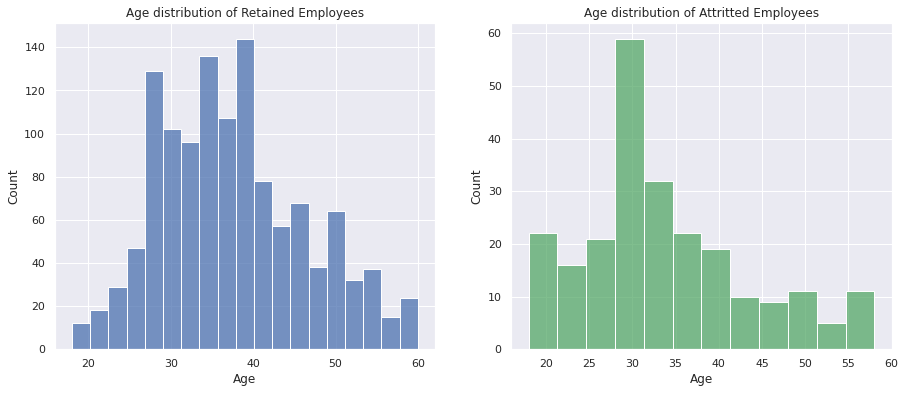

In [89]:
# Visualizing the summary of retained and attrited data against age using seaborn histplot
sns.set()

#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# First plot
sns.histplot(data=df_RE, x="Age", color='b', ax=axes[0]).set(title="Age distribution of Retained Employees", xlabel='Age')


# Second plot
sns.histplot(data=df_Attr, x="Age", color='g', ax=axes[1]).set(title="Age distribution of Attritted Employees", xlabel='Age');

* In the chart for Retained employees, it clearly shows that the people who stayed back from Age 18 - 25 are less than those who left.
* Meanwhile Age 30-35 had high rate of Attrition, but still people who stayed within that age is more.
* Attrition rate decreases from age 40 and people who stayed werent many but still more than people that left. 
* This could be due to people reaching retiring age and other factors as to why they tend to have reduced attriton rate

#### 4. Is Income the main factor in employee attrition?


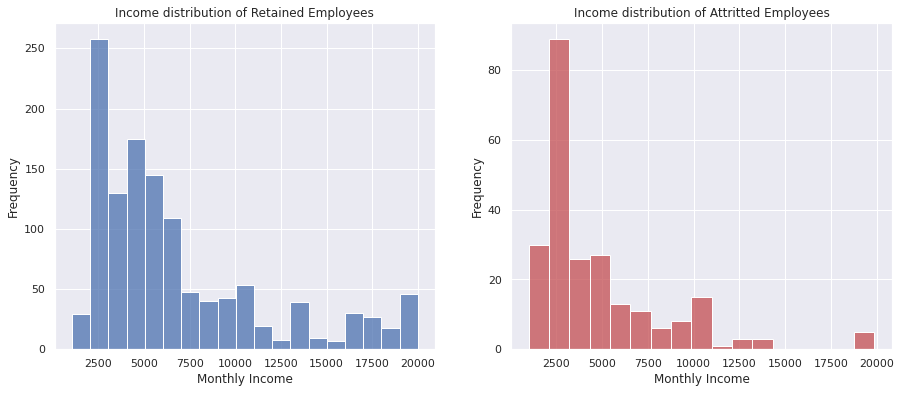

In [101]:
#set seaborn plotting aesthetics as default
sns.set()

#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# First plot
sns.histplot(data=df_RE, x="MonthlyIncome", color='b', ax=axes[0]).set(title="Income distribution of Retained Employees", xlabel='Monthly Income', ylabel='Frequency')

# Second plot
sns.histplot(data=df_Attr, x="MonthlyIncome", color='r', ax=axes[1]).set(title="Income distribution of Attritted Employees", xlabel='Monthly Income', ylabel='Frequency');

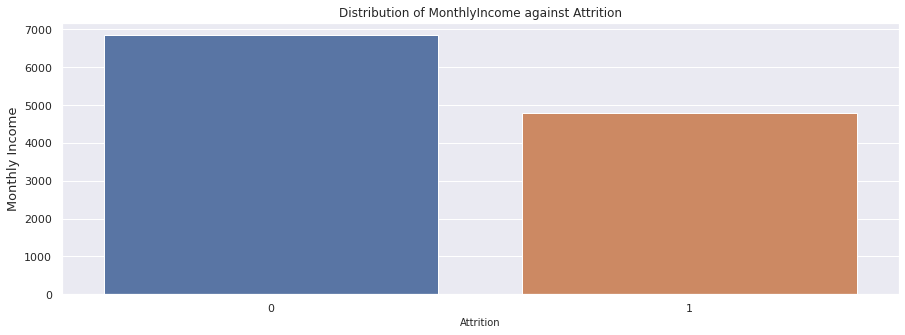

In [100]:
plt.figure(figsize = (15,5))
ax = sns.barplot(x = 'Attrition', y= 'MonthlyIncome', data = df, ci=None)
sns.set(rc={'figure.figsize':(10,5)})
plt.xlabel("Attrition",fontsize= 10)
plt.ylabel("Monthly Income",fontsize= 13)
plt.title('Distribution of MonthlyIncome against Attrition');

* From the chart above, i observed that people who earn below 5000 dollars are likely to get attritted, the higher the money, the lesser the attrition rate. 
* In the second chart, i observed that most people who were retained earn almost upto 7000 dollars compared to those who were attritted who mostly earn around 4500 dollars, this could be the reason alongside other underlying factors to why people get attritted.


Conclusion: 
* This could lead to attrition but isnt the main factor to attrition, as there are other stronger underlying factors, like people who work OverTime.

#### 5. How does work-life balance impact the overall attrition rate??

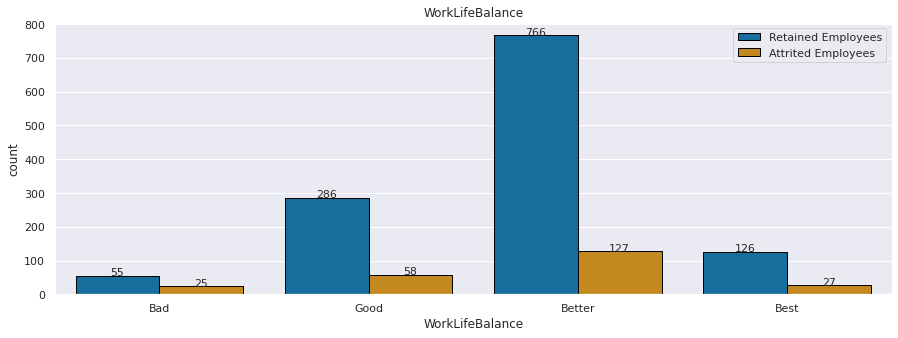

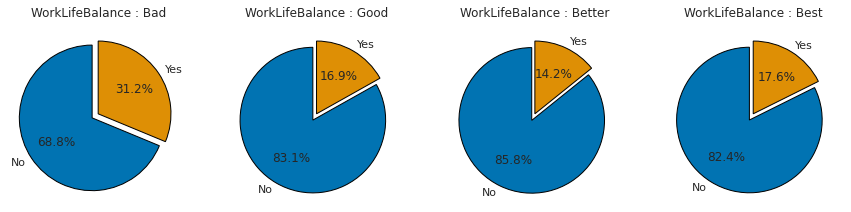

In [117]:
# Visualisation of 'WorkLifeBalance' w.r.t 'Attrition' col
plt.figure(figsize = (15, 5))

ax = sns.countplot('WorkLifeBalance', data = df, hue = 'Attrition', palette = colors,edgecolor = 'black');
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height()+0.01, rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.legend(['Retained Employees', 'Attrited Employees'])
ax.set_xticklabels(['Bad', 'Good', 'Better', 'Best'])
plt.title('WorkLifeBalance');

fig = plt.subplots(nrows = 1,ncols = 4,figsize = (15,15))

for i in range(len(df['WorkLifeBalance'].unique())):
    plt.subplot(1,4,i+1)
    l = list(df.loc[(df['WorkLifeBalance'] == (i+1))]['Attrition'].value_counts())
    circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]
    plt.pie(circle,labels = list(tf['Attrition'][k] for k in sorted(df['Attrition'].unique())),autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),
            colors = colors, wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
    plt.title('WorkLifeBalance : ' + ['Bad', 'Good', 'Better', 'Best'][i]);

* In the charts above, its shown that people who stayed back have a higher count of 20% bad worklifebalance, more than those who left.
* In the second chart, it shows that the rate of attrition is very high for people with badworklifebalance.
* Surprisingly, employees with best worlife balance gets to have the second highest rate of attrited employees. 

Conclusion:
* There is no trend here, and neither does this attribute seem to have an impact to why employees get attrited.

### General Conclusion:
* From all my analysis of this data so far, all the columns i worked on seem to tell its own story as to why people leave the company, but none of them have really stong correlation as to why they actually leave the company.
* OverTime seems to be close, but weekly correlated, but from my analysis, people who take up OverTime have higher chance of leaving, but alongside other underlying factors, including income, maritalstatus e.t.c